---
# S&P 500 Stock Analysis: Is Technology the Right Investment for the Future?

---
## Introduction

The S&P 500 stock market index, maintained by S&P Dow Jones Indices, comprises 505 common stocks issued by 500 large-cap companies and traded on American exchanges, and covers about 80 percent of the American equity market by capitalization, i.e. S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States. Since it is one of the most commonly followed equity indices, many consider it to be also one of the best representations of the U.S. stock market. The S&P 500 component stocks cover eleven market sectors and a total of 128 sub-industries. 

The objective of this project is to perform the U.S equity market/stocks analysis with a focus on the Technology sector through data science concepts, knowledge, and tools. The data analysis and calculation are based on Python software with the following modules: NumPy & Pandas, and matplotlib & seaborn libraries.

These S&P 500 stocks are categorized as eleven sectors:
* Industrials
* Technology
* Consumer Cyclical
* Healthcare
* Consumer Defensive
* Financial Services
* Utilities
* Real Estate
* Basic Materials
* Communication Services
* Energy

The S&P 500 stocks analysis through Python covers data descriptive analysis, stock price change/return under S&P 500 index level, sector level and also stock level. The historical positive returns percentage for the data are estimated, and the sector correlation with S&P 500 index are calculated and analyzed. Stocks different level seasonality analysis is performed with both daily & monthly duration. A trading strategy based on the stock AMZN seasonality analysis result is recommended and the corresponding strategy return shows that this strategy competes the market return. Finally, the stock sector return forecasting and train/test configuration with K nearest neighbor approach is executed with high accuracy score.

The stock/ticker raw data has a 5-year period: from February 08, 2013 to February 07, 2018.

The project consists of 5 parts:
* Part 1 - S&P 500 stocks historical data collection and cleaning
* Part 2 - Descriptive statistic analysis for S&P 500 stocks
* Part 3 - Data analysis under stock/industry level
* Part 4 - Stock price forecasting and prediction
* Part 5 - Conclusion


Each part is provided in a separate Python file with multiple tasks. It is recommended to follow the order of the files. The Python modules and libraries for this project should be loaded first for the whole project.

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api
import statsmodels as sm
import scipy.stats as ss
import collections as col
import scipy.stats as stats
from pandas.plotting import autocorrelation_plot
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from collections import Counter
from scipy.stats import chisquare
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


---
## Part 1: S&P 500 Stocks Historical Data Collection and Cleaning

S&P 500 index component stocks has a total of 505 stocks and the stock historical prices are ranged within different periods. This part focuses on importing the raw historical stock market close prices into the Pandas, identifying the missing stock prices, resolving mismatches in the raw data document and preparing for the stock price analysis.

The project's data foundation is combined with the cleaning and merging of two datasets, one with numerical data (the S&P 500 stock financial information such as close price) and the other one with categorial data (company names and industries).

#### Task 1:
* Import raw data;
* Identify missing values, anomalies and outliers (Data cleaning);
* Merge datasets and resolve mismatches;

In [2]:
# Import and Merge Datasets
sp500 = pd.read_csv("https://raw.githubusercontent.com/ProjectTeam4/ProjectTeam4.github.io/master/stock%20data.csv")
stockReference = pd.read_csv("https://raw.githubusercontent.com/ProjectTeam4/ProjectTeam4.github.io/master/companies.csv")

fullDataset = pd.merge(sp500, stockReference, how="left", left_on='Name', right_on='ticker')
fullDataset = fullDataset[['date', 'close', 'Name', 'ticker', 'company name', 'sector']]
fullDataset.head()


,date,close,Name,ticker,company name,sector
0,08-02-2013,14.75,AAL,AAL,American Airlines Group Inc.,Industrials
1,11-02-2013,14.46,AAL,AAL,American Airlines Group Inc.,Industrials
2,12-02-2013,14.27,AAL,AAL,American Airlines Group Inc.,Industrials
3,13-02-2013,14.66,AAL,AAL,American Airlines Group Inc.,Industrials
4,14-02-2013,13.99,AAL,AAL,American Airlines Group Inc.,Industrials


In [3]:
# Identify Mismatches
# Noticed that 21 stocks could not match to available reference information
unmatchedData = fullDataset[fullDataset["ticker"].isnull()]
print(unmatchedData.Name.unique())
print(unmatchedData.date.unique())


['AET' 'ANDV' 'CA' 'CBG' 'COL' 'CSRA' 'DPS' 'ESRX' 'EVHC' 'GGP' 'HCN'
 'KORS' 'LUK' 'MON' 'PCLN' 'PX' 'SCG' 'SNI' 'TWX' 'WYN' 'XL']
['08-02-2013' '11-02-2013' '12-02-2013' ... '05-02-2018' '06-02-2018'
 '07-02-2018']


In [4]:
# Resolve mismatch issue
# Manually looked up "Names" and appended to stock reference file
stockReference_v2 = pd.read_csv("https://raw.githubusercontent.com/ProjectTeam4/ProjectTeam4.github.io/master/companies_updated.csv")
fullDataset_v2 = pd.merge(sp500, stockReference_v2, how="left", left_on='Name', right_on='ticker')
fullDataset_v2 = fullDataset_v2[['date', 'close', 'Name', 'ticker', 'company name', 'sector']]

unmatchedData_v2 = fullDataset_v2[fullDataset_v2["ticker"].isnull()]
print(unmatchedData_v2.Name.unique())
print(unmatchedData_v2.date.unique())


[]
[]


In [5]:
# Identify Inconsistencies
# Noticed that the list of stocks were captured based on date of data pull and does not populate historical information for
# stocks that fell out of SP500 between the start and end date
countByDate = fullDataset_v2.groupby('date').count()
countByDate.sort_values(by=['sector'], ascending=True)


,close,Name,ticker,company name,sector
date,,,,,
26-04-2013,472,472,472,472,472
22-04-2013,476,476,476,476,476
02-05-2013,476,476,476,476,476
15-04-2013,476,476,476,476,476
04-03-2013,476,476,476,476,476
...,...,...,...,...,...
11-01-2018,505,505,505,505,505
29-01-2018,505,505,505,505,505
05-12-2017,505,505,505,505,505


In [6]:
# Resolve inconsistency issue

# Was not able to identify the 20+ stocks that fell out of SP500 from a reliable source. Considered the option of removing 
# the newly listed securities out to have consistent number of stocks, but decided that it was more biased to remove real data

In [7]:
# Compile Final Dataset for Analysis
cleanDataset = fullDataset_v2[['date', 'close', 'ticker', 'company name', 'sector']]
cleanDataset.head()


,date,close,ticker,company name,sector
0,08-02-2013,14.75,AAL,American Airlines Group Inc.,Industrials
1,11-02-2013,14.46,AAL,American Airlines Group Inc.,Industrials
2,12-02-2013,14.27,AAL,American Airlines Group Inc.,Industrials
3,13-02-2013,14.66,AAL,American Airlines Group Inc.,Industrials
4,14-02-2013,13.99,AAL,American Airlines Group Inc.,Industrials


#### **Observations/Comments:**

- As the datasets were captured on different dates, some stock information did not match to stock references available. A majority of the stocks moved in and out of the list because of acqusitions.
- Stock reference information was free and easily accessible while the stock price information was difficult to piece together and typically came with a cost.

---
## Part 2 - Descriptive Statistic Analysis for S&P 500 Stocks

This part provides a primary and fundamental analysis through the statistical approach which includes verifying the stock numbers, sector numbers, stock historical price statistics summary and their visualization.


#### Task 2:
* Perform descriptive analysis;
* first question: how has the composition of stocks by industry changed over time?
* Calculate and graph stock composition by industry over time;

In [8]:
# Verify Total Ticker/Company Unique Number:
len(cleanDataset.ticker.unique())

# There are a total of 505 stocks from the raw data

505

In [9]:
# List Ticker/Company Name
TickerList = cleanDataset.ticker.unique()
TickerList

# The stock ticker names are displayed

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [10]:
# Check Sector Unique Number:
len(cleanDataset.sector.unique())

# A total of 11 sectors from raw data

11

In [11]:
# List Sector Name
SectorName = cleanDataset.sector.unique()
SectorName

# Display the sector names

array(['Industrials', 'Technology', 'Consumer Cyclical', 'Healthcare',
       'Consumer Defensive', 'Financial Services', 'Utilities',
       'Real Estate', 'Basic Materials', 'Communication Services',
       'Energy'], dtype=object)

In [12]:
# Create DataFrame for Ticker vs Sector
TickerSector = pd.pivot_table(cleanDataset, index=['ticker','sector'])
#TickerSector
TickerSector.head()

# Provide the mapping for ticker vs sector

,,close
ticker,sector,
A,Healthcare,49.202025
AAL,Industrials,38.393252
AAP,Consumer Cyclical,132.433463
AAPL,Technology,109.066698
ABBV,Healthcare,60.864440


In [13]:
#####################################
# Prepare Stock Price (Daily)

# Reshape Historical Close for Ticker with Pivot Function
HistData = cleanDataset.pivot(index='date', columns='ticker', values='close')
HistData.head()

# Prepare the stock historical price data table for further analysis

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
01-02-2016,37.69,39.38,154.89,96.4300,54.39,89.00,38.45,106.28,89.61,53.17,...,36.35,49.90,76.29,60.03,37.72,35.62,73.10,99.03,22.50,42.96
01-02-2017,49.26,44.05,160.59,128.7500,60.89,88.61,42.33,113.21,113.36,76.17,...,37.93,57.39,82.94,56.90,28.28,49.15,64.87,118.51,42.46,55.32
01-02-2018,72.83,53.88,117.29,167.7800,116.34,99.29,62.18,160.46,199.38,91.65,...,36.79,72.49,89.07,60.73,32.75,74.84,83.98,128.19,54.98,77.82
01-03-2013,41.93,13.61,76.37,61.4957,37.81,47.98,33.60,74.82,39.83,45.23,...,28.82,36.65,89.43,41.16,32.60,27.49,65.21,74.99,24.04,34.60
01-03-2016,38.59,41.83,153.35,100.5300,56.34,87.43,39.33,103.45,88.37,54.70,...,35.56,48.21,81.28,60.43,39.72,37.94,76.19,97.39,22.31,42.10


In [14]:
# Display Historical Data Table Information
HistData.info()

# Check the base information for data table

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 01-02-2016 to 31-12-2015
Columns: 505 entries, A to ZTS
dtypes: float64(505)
memory usage: 4.9+ MB


In [15]:
# Review Historical Stock Price Index/Date 
HistData.index

# Display the index/date for historical stock price and identify the date is not in an ascending order

Index(['01-02-2016', '01-02-2017', '01-02-2018', '01-03-2013', '01-03-2016',
       '01-03-2017', '01-04-2013', '01-04-2014', '01-04-2015', '01-04-2016',
       ...
       '31-08-2015', '31-08-2016', '31-08-2017', '31-10-2013', '31-10-2014',
       '31-10-2016', '31-10-2017', '31-12-2013', '31-12-2014', '31-12-2015'],
      dtype='object', name='date', length=1259)

In [16]:
# Sort HistData DataFrame Date
HistData.index = pd.to_datetime(HistData.index, dayfirst=True)
HistData.sort_index(inplace=True)
HistData.head()

# Sort the historical stock price table

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,...,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,...,28.31,37.46,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,...,28.41,37.58,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,...,28.42,37.80,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,...,28.22,38.44,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27


In [17]:
# Review Historical Stock Price Index/Date 
HistData.index

# Re-check the index/date for historical stock price and fix the date unordered issue

DatetimeIndex(['2013-02-08', '2013-02-11', '2013-02-12', '2013-02-13',
               '2013-02-14', '2013-02-15', '2013-02-19', '2013-02-20',
               '2013-02-21', '2013-02-22',
               ...
               '2018-01-25', '2018-01-26', '2018-01-29', '2018-01-30',
               '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', name='date', length=1259, freq=None)

In [18]:
#################################################
# Stock Price (Daily) Description Analysis

# Check Potential NaN at Each Column
HistData.isnull().sum().unique()


array([   0,  196, 1215, 1116, 1107,    2,  409,   86,  698,   16, 1150,
       1044,   10,  962,   90,  855,  284,  983,  678,    5,  342,   62,
        604,  299,  478,  371,  795,  731,  597], dtype=int64)

In [19]:
# Provide the Fundamental Stock Price Information
HistData.describe()

# Display statistical analysis for historical stock price

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.00000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,...,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,49.202025,38.393252,132.433463,109.066698,60.86444,82.092979,42.940326,101.119079,90.458156,60.931932,...,35.315099,49.833474,87.668447,53.821882,40.486807,41.434095,75.451009,105.606291,32.171790,45.098648
std,9.229804,10.957636,31.274463,30.556812,13.73038,16.315690,5.860169,22.129031,36.997773,13.383631,...,3.874693,9.517797,6.959475,7.599269,7.949466,11.319674,7.485003,15.052699,7.673401,11.981390
min,33.370000,13.020000,76.180000,55.789900,35.27000,46.180000,32.930000,70.280000,38.110000,42.340000,...,27.960000,35.510000,68.710000,40.240000,27.520000,24.190000,59.700000,72.380000,19.900000,28.400000
25%,41.560000,34.330000,104.440000,84.830650,52.65000,70.525000,38.475000,80.670000,65.865000,50.272500,...,32.175000,43.222500,82.435000,47.015000,34.400000,34.590000,70.225000,96.075000,27.505000,32.830000
50%,46.700000,40.870000,141.300000,109.010000,60.17000,82.560000,42.300000,97.770000,80.590000,56.930000,...,35.010000,46.860000,87.290000,53.540000,40.000000,37.280000,74.100000,105.970000,29.230000,45.620000
75%,56.495000,46.535000,156.730000,127.120000,65.74500,92.520000,45.785000,117.045000,105.710000,67.895000,...,37.770000,54.060000,92.085000,60.805000,45.480000,49.155000,80.470000,117.315000,32.462500,51.295000
max,74.820000,58.470000,200.380000,179.260000,123.21000,115.480000,63.420000,162.550000,201.300000,97.240000,...,46.660000,76.300000,104.380000,68.580000,57.280000,75.660000,94.880000,133.090000,54.980000,80.090000


Text(0.5, 1.0, 'S&P 500 Stock Average Price Histogram')

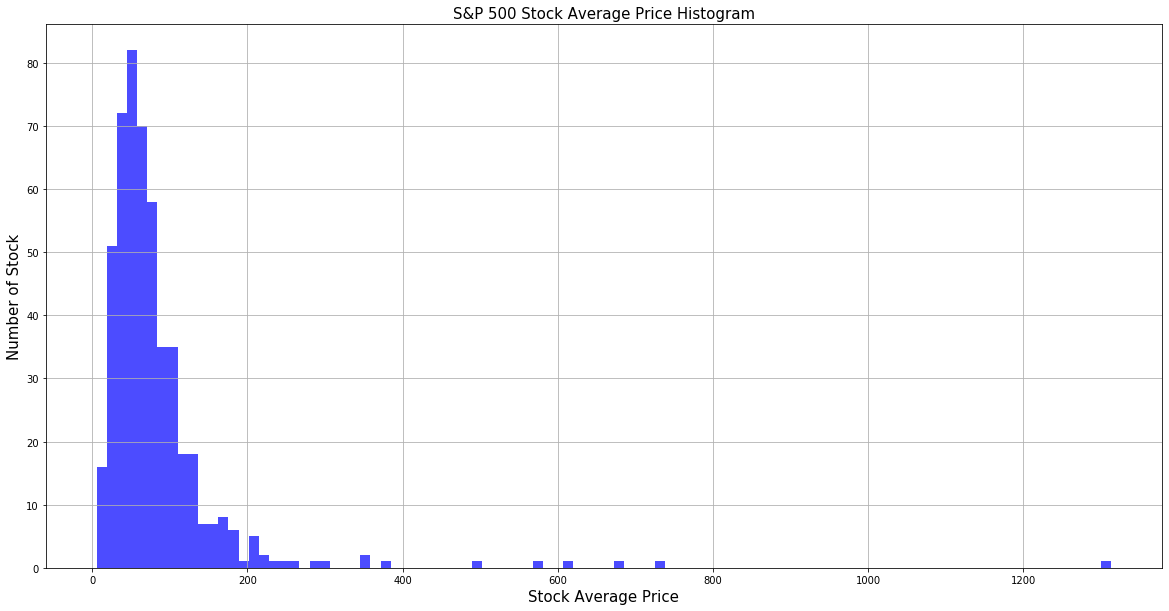

In [20]:
# Plot the Historical Graph of the Stock Average Price
HistDataMean = HistData.mean()
HistDataMean.hist(bins='auto', color='blue', alpha=0.7, figsize = (20,10))
plt.xlabel('Stock Average Price', size = 15)
plt.ylabel('Number of Stock', size = 15)
plt.title('S&P 500 Stock Average Price Histogram', size = 15)

# Show the distribution of stock average price with majority within [0, 200]

Text(0.5, 1.0, 'S&P 500 Stock Median Price Histogram')

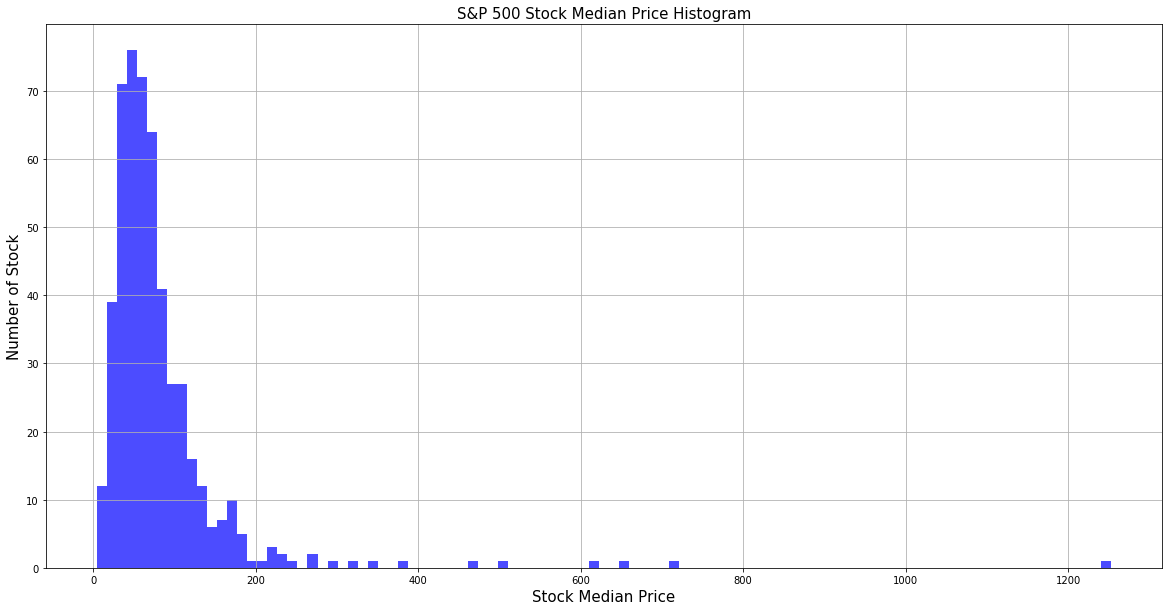

In [21]:
# Plot the Historical Graph of the Stock Median Price
HistDataMedian = HistData.median()
HistDataMedian.hist(bins='auto', color='blue', alpha=0.7, figsize = (20,10))
plt.xlabel('Stock Median Price', size = 15)
plt.ylabel('Number of Stock', size = 15)
plt.title('S&P 500 Stock Median Price Histogram', size = 15)

# Show the distribution of stock median price with majority within [0, 200]
# Stock median price distribution is consistent with this of average price

In [22]:
# Generate the max stock price variance
HistDataVar = HistData.var()
MaxVar = max(HistDataVar)
MaxVar

# Display the most potential volatial stock price

102741.70732546017

Text(0.5, 1.0, 'S&P 500 Stock Price Variance Histogram')

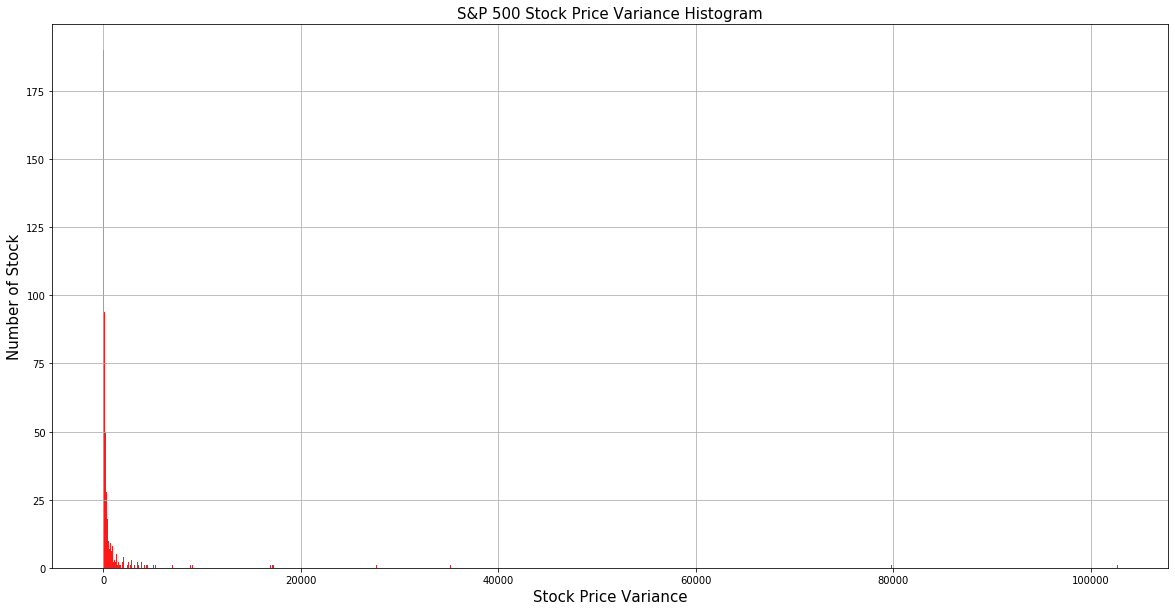

In [23]:
# Plot the Historical Graph of the Stock Price Variance
HistDataVar.hist(bins='auto', color='red', alpha=0.9, figsize = (20, 10))
plt.xlabel('Stock Price Variance', size = 15)
plt.ylabel('Number of Stock', size = 15)
plt.title('S&P 500 Stock Price Variance Histogram', size = 15)

# Show the distribution of stock price Variance 

In [24]:
# Generate the max stock price standard deviation
HistDataStd = HistData.std()
MaxStd = max(HistDataStd)
MaxStd

# Display the most potential volatial stock price

320.53347301874754

Text(0.5, 1.0, 'S&P 500 Stock Price Standard Deviation Histogram')

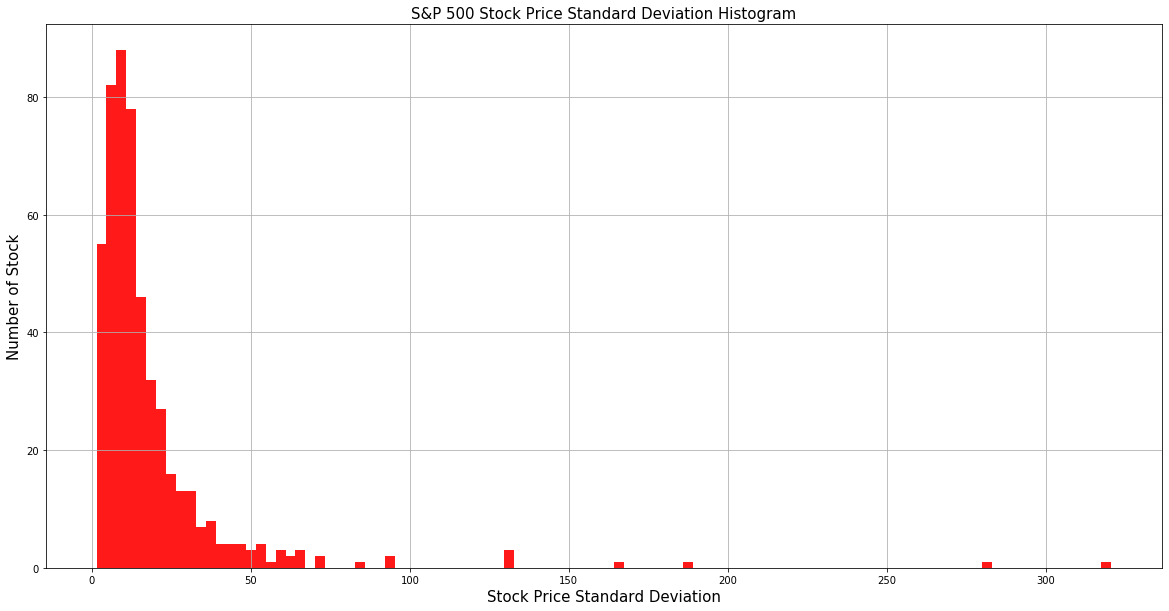

In [25]:
# Plot the Historical Graph of the Stock Price Standard Deviation
HistDataStd.hist(bins='auto', color='red', alpha=0.9, figsize=(20, 10))
plt.xlabel('Stock Price Standard Deviation', size = 15)
plt.ylabel('Number of Stock', size = 15)
plt.title('S&P 500 Stock Price Standard Deviation Histogram', size = 15)

# Show the distribution of stock price standard deviation with majority within [0, 50]

In [26]:
# Check the Number of Historical Price Frequency per Stock/Ticker
CountPriceNumber = sorted(HistData.count(), reverse=True)
CountFrequence = col.Counter(CountPriceNumber)
CountFrequence

# Display the frequency of the number for stock historical price

Counter({1259: 470,
         1257: 2,
         1254: 1,
         1249: 1,
         1243: 2,
         1197: 1,
         1173: 1,
         1169: 4,
         1063: 1,
         975: 1,
         960: 1,
         917: 1,
         888: 1,
         850: 1,
         781: 1,
         662: 1,
         655: 2,
         581: 2,
         561: 1,
         528: 1,
         464: 1,
         404: 1,
         297: 1,
         276: 1,
         215: 1,
         152: 1,
         143: 1,
         109: 1,
         44: 1})

In [27]:
# Calculate the Percentage of Each Number of Stocks
for key in CountFrequence:
    percent = CountFrequence[key]/sum(CountFrequence.values())
    print(key, "{:.1%}".format(percent))

# The top stock historical price number 1259 have 93.1%

1259 93.1%
1257 0.4%
1254 0.2%
1249 0.2%
1243 0.4%
1197 0.2%
1173 0.2%
1169 0.8%
1063 0.2%
975 0.2%
960 0.2%
917 0.2%
888 0.2%
850 0.2%
781 0.2%
662 0.2%
655 0.4%
581 0.4%
561 0.2%
528 0.2%
464 0.2%
404 0.2%
297 0.2%
276 0.2%
215 0.2%
152 0.2%
143 0.2%
109 0.2%
44 0.2%


#### Observations/Comments


- Based on the statistical analysis for the stock historical prices, the majority of the stock price mean and median are close and the standard deviation are within a small area
- Close to 7% of stocks do not have complete daily data. Many joined the SP500 index between 2013 and 2018.  

---
## Part 3 - Data Analysis under Stock/Industry Level

This part performs the analysis on stock prices daily and monthly return for three levels: i.e. stock/ticker level, sector level, and index level. The analysis includes: return distribution, percentage of positive return, correlation for each stock, seasonality analysis and sector return forecasting.

#### Task 3: 
* Second question: What are the daily and monthly price changes at individual stock and industry level? (Sector Level) 
* Calculate daily and monthly price changes by industry and determine distribution of standard deviation

In [28]:
# Calculate Daily Return by Ticker
# Some companies joined to group in different times and during the daily return calculation we got NaN values in different times. That's why we need to keep NaN rows.  
SP_500_daily_returns_by_ticker = HistData.pct_change()
SP_500_daily_returns_by_ticker


ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,-0.010648,-0.019661,-0.006464,0.010422,-0.011034,-0.002772,-0.004359,-0.003274,-0.012270,0.008315,...,0.002479,-0.001333,-0.003724,-0.000700,0.003769,0.013658,-0.011485,-0.002637,0.002900,0.006354
2013-02-12,0.000448,-0.013140,0.002679,-0.025067,-0.011994,0.004277,0.001168,0.004106,0.006470,0.004123,...,0.003532,0.003203,0.002039,0.000700,-0.003755,0.017844,0.003098,-0.002776,0.011565,0.014432
2013-02-13,0.002913,0.027330,0.004707,-0.001903,-0.004235,-0.006814,0.004665,0.002590,-0.002057,-0.000216,...,0.000352,0.005854,0.002374,0.004899,0.005025,0.011091,-0.005251,0.007423,0.010208,-0.005631
2013-02-14,-0.003799,-0.045703,-0.001646,-0.000899,0.036859,0.002787,0.006965,-0.005846,-0.005153,0.006053,...,-0.007037,0.016931,-0.001692,-0.003946,0.003750,0.007431,-0.008073,0.004474,-0.004446,-0.008346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,-0.008171,-0.008100,0.002564,0.002090,0.036714,-0.003813,0.000322,-0.001493,-0.001902,-0.002503,...,-0.001357,-0.007258,0.020275,-0.001316,-0.040434,0.035704,-0.007211,0.008417,0.017583,0.014206
2018-02-02,-0.021694,-0.033036,-0.028647,-0.043390,-0.010057,-0.032934,-0.007880,-0.022186,-0.018758,-0.027714,...,0.039685,-0.025521,-0.050971,-0.011032,-0.034198,0.010957,-0.016075,-0.018722,-0.015096,-0.013364
2018-02-05,-0.042526,-0.044914,-0.035724,-0.024984,-0.049145,-0.042908,-0.047982,-0.032314,-0.027448,-0.041634,...,-0.014902,-0.051954,-0.056903,-0.025308,-0.007904,-0.039651,-0.034249,-0.020749,-0.046168,-0.038421


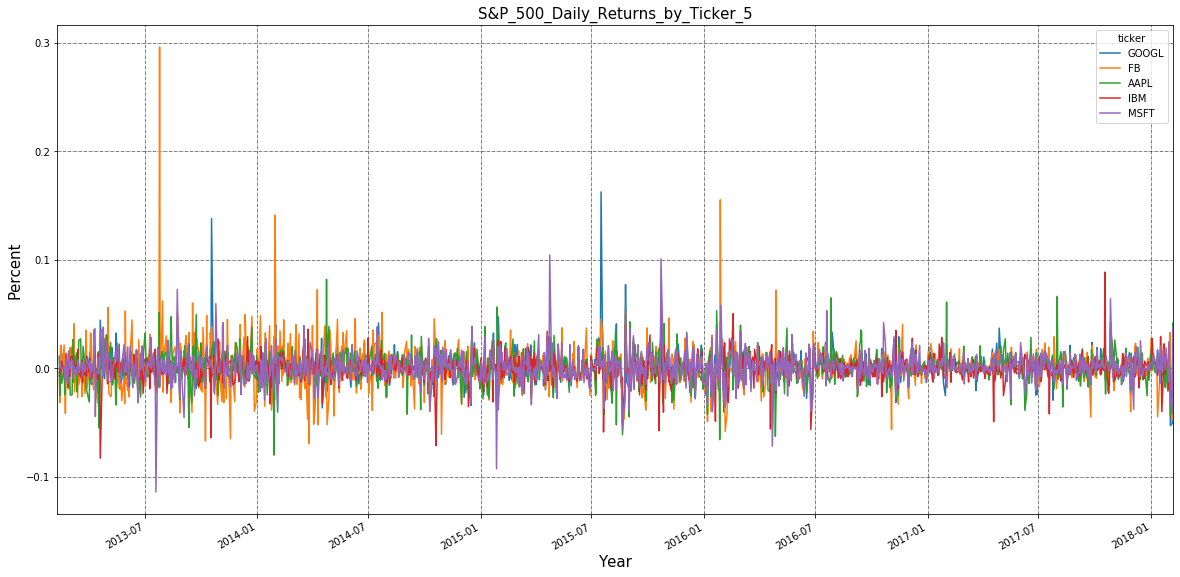

In [29]:
# 5 Big Tech companies
SP_500_daily_returns_by_ticker_5 = SP_500_daily_returns_by_ticker[['GOOGL', 'FB', 'AAPL', 'IBM', 'MSFT']]
SP_500_daily_returns_by_ticker_5.plot(figsize=(20, 10))
plt.title('S&P_500_Daily_Returns_by_Ticker_5', size=15)
plt.xlabel('Year', size=15)
plt.xticks()
plt.ylabel('Percent', size=15)
plt.yticks()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()


In [30]:
# 'GOOGL', 'FB', 'AAPL', 'IBM', 'MSFT' - correlation of daily returns
SP_500_daily_returns_by_ticker_5_corr = SP_500_daily_returns_by_ticker_5.corr()
SP_500_daily_returns_by_ticker_5_corr


ticker,GOOGL,FB,AAPL,IBM,MSFT
ticker,,,,,
GOOGL,1.000000,0.459305,0.348858,0.318281,0.488373
FB,0.459305,1.000000,0.310517,0.199714,0.313899
AAPL,0.348858,0.310517,1.000000,0.263927,0.366598
IBM,0.318281,0.199714,0.263927,1.000000,0.363277
MSFT,0.488373,0.313899,0.366598,0.363277,1.000000


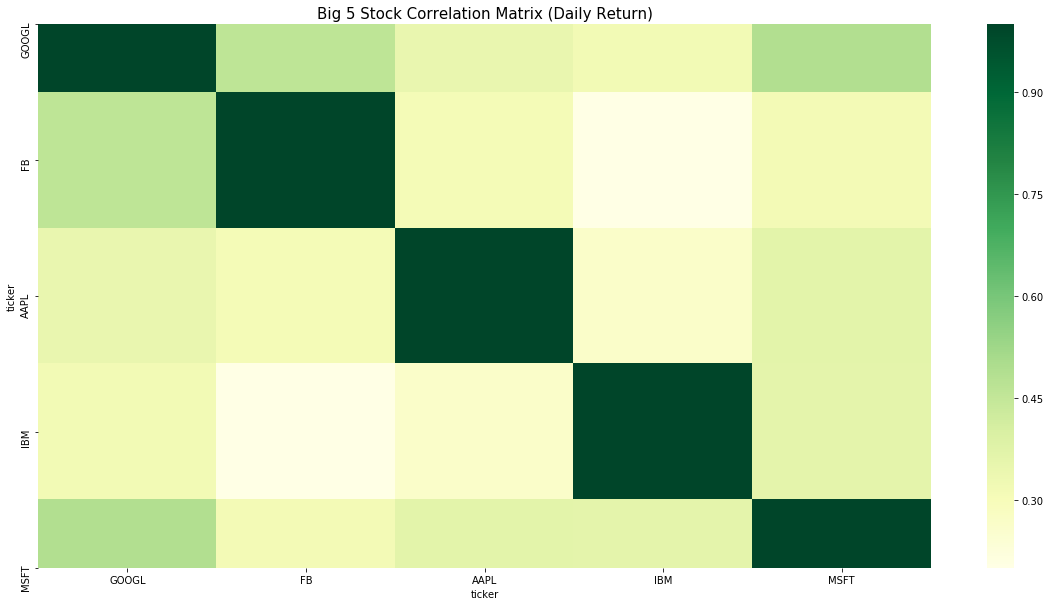

In [31]:
# Plot Big 5 Stock Correlation Matrix (Daily Return)
plt.figure(figsize=(20, 10))
plt.title('Big 5 Stock Correlation Matrix (Daily Return)', size=15)
sns.heatmap(SP_500_daily_returns_by_ticker_5_corr, cmap='YlGn', )


In [32]:
# Daily distribution of standard deviation by ticker level
SP_500_daily_returns_by_ticker_std = SP_500_daily_returns_by_ticker.std()
SP_500_daily_returns_by_ticker_std


ticker
A       0.015482
AAL     0.022456
AAP     0.018958
AAPL    0.014593
ABBV    0.016856
          ...   
XYL     0.013689
YUM     0.016509
ZBH     0.013098
ZION    0.016358
ZTS     0.014142
Length: 505, dtype: float64

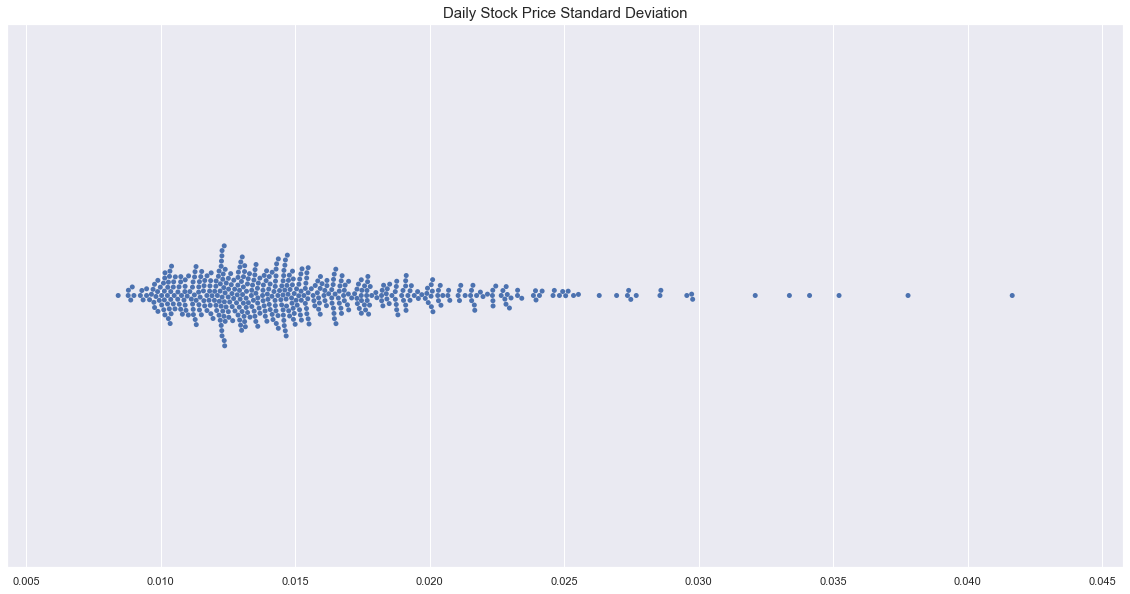

In [33]:
# Swarm Plot for Daily Stock Price Standard Deviation
sns.set(rc={'figure.figsize':(20,10)})
plt.title('Daily Stock Price Standard Deviation', size = 15)
sns.swarmplot(SP_500_daily_returns_by_ticker_std)


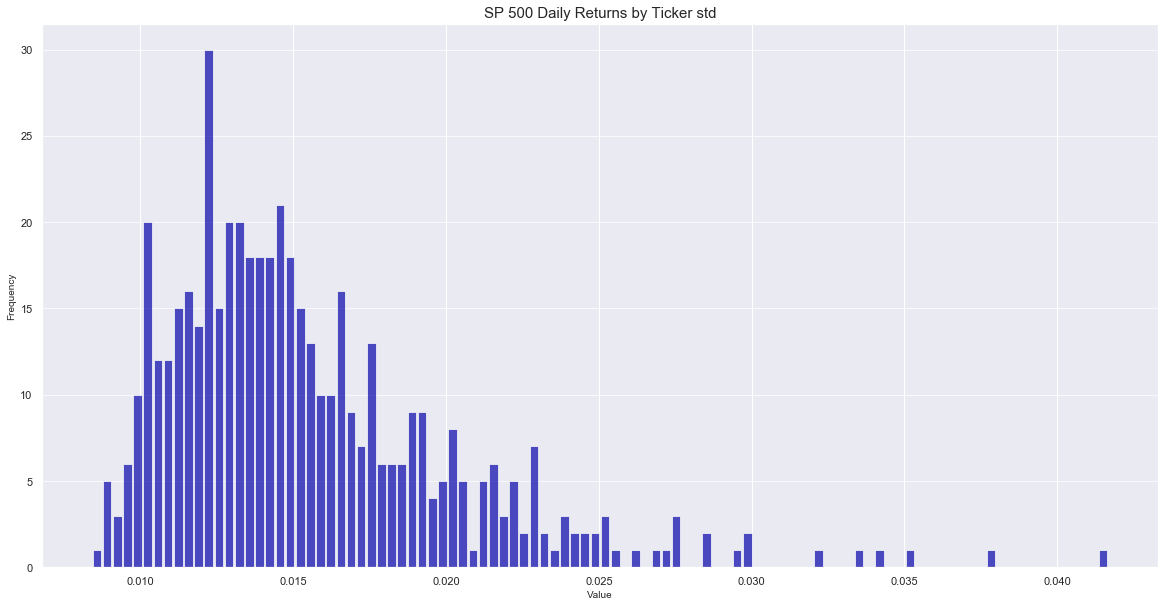

In [34]:
# Historical Graph Plot for Daily Stock Price Standard Deviation
plt.figure(figsize=[20, 10])
n, bins, patches = plt.hist(SP_500_daily_returns_by_ticker_std, bins=100, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value', size=10, )
plt.ylabel('Frequency', size=10)
plt.xticks()
plt.yticks()
plt.ylabel('Frequency', size=10,)
plt.title('SP 500 Daily Returns by Ticker std', size=15)
plt.show()


In [35]:
# Monthly returns by Ticker
SP_500_monthly_data_by_ticker = HistData.resample('BM').last()
SP_500_monthly_returns_by_ticker = SP_500_monthly_data_by_ticker.pct_change()
SP_500_monthly_returns_by_ticker


ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-29,0.011813,0.263589,0.082657,0.002855,0.104550,0.090042,0.045280,0.021651,0.106970,0.028085,...,0.057961,0.024148,0.006253,0.024626,0.060419,0.002182,0.098656,0.003469,0.034783,-0.001495
2013-04-30,-0.012628,-0.004125,0.014882,0.000270,0.129230,0.051895,0.045300,0.072002,0.035965,-0.053775,...,0.027723,-0.006812,-0.012429,-0.002121,-0.002326,0.006894,-0.053100,0.016352,-0.014806,-0.011377
2013-05-31,0.096766,0.039645,-0.028135,0.015708,-0.072964,-0.000739,-0.006771,0.008227,-0.048137,0.044101,...,0.009313,0.072276,0.016631,-0.013932,0.024476,0.014054,-0.005432,0.026946,0.140130,-0.030890
2013-06-28,-0.059186,-0.065452,-0.004293,-0.118303,-0.031623,0.032359,-0.048814,-0.123615,0.061757,-0.018942,...,-0.035317,-0.025584,-0.001326,-0.019157,0.031854,-0.042644,0.023469,-0.045472,0.030281,-0.034687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-31,0.059657,-0.014108,-0.176008,0.096808,0.015643,-0.070091,0.016304,0.053972,0.174152,0.059533,...,0.025856,0.040378,0.016711,0.021067,-0.089516,0.062270,0.011411,0.038688,-0.015261,0.000941
2017-11-30,0.017786,0.078385,0.235625,0.016623,0.073906,0.102274,0.039462,0.039688,0.036024,-0.056846,...,-0.040771,-0.056724,-0.000720,0.097265,-0.021445,0.042237,0.121155,-0.037165,0.066509,0.132717
2017-12-29,-0.032785,0.030501,-0.012970,-0.015246,-0.002167,0.082528,0.012418,0.034322,-0.034331,0.033910,...,-0.094281,-0.030068,0.004202,-0.017609,-0.017195,-0.016441,-0.022283,0.030487,0.025832,-0.003458


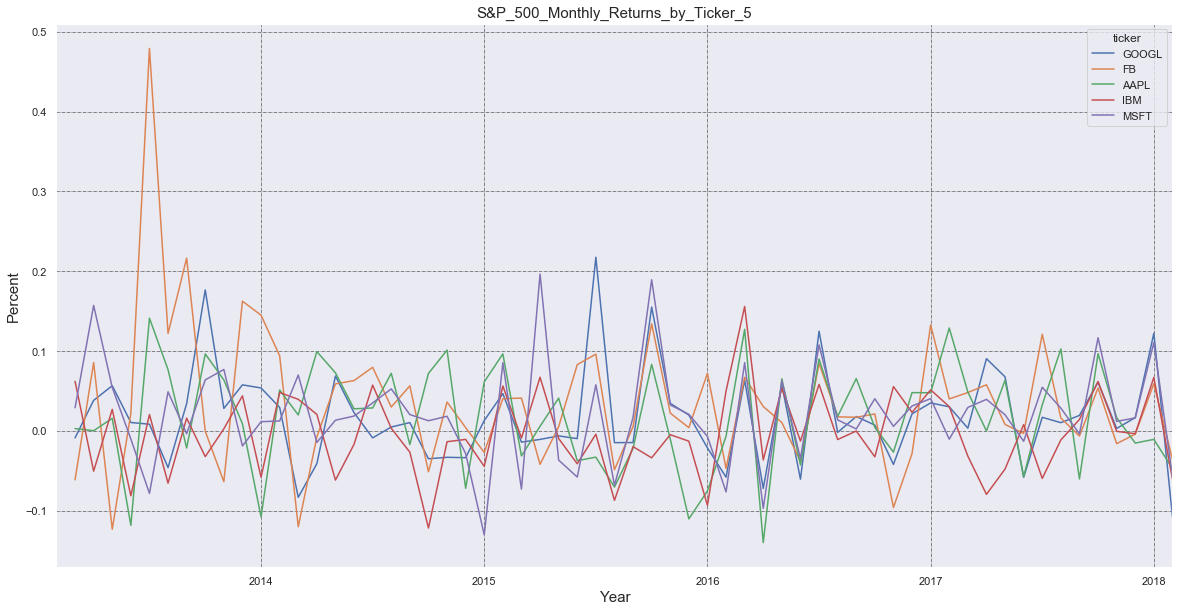

In [36]:
# 5 Big Tech companies
SP_500_monthly_returns_by_ticker_5 = SP_500_monthly_returns_by_ticker[['GOOGL', 'FB', 'AAPL', 'IBM', 'MSFT']]
SP_500_monthly_returns_by_ticker_5.plot(figsize=(20, 10))
plt.title('S&P_500_Monthly_Returns_by_Ticker_5', size=15)
plt.xlabel('Year', size=15)
plt.xticks()
plt.ylabel('Percent', size=15,)
plt.yticks()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()


In [37]:
# 'GOOGL', 'FB', 'AAPL', 'IBM', 'MSFT' - correlation of daily returns
SP_500_monthly_returns_by_ticker_5_corr = SP_500_monthly_returns_by_ticker_5.corr()
SP_500_monthly_returns_by_ticker_5_corr


ticker,GOOGL,FB,AAPL,IBM,MSFT
ticker,,,,,
GOOGL,1.000000,0.294914,0.275411,0.129731,0.502539
FB,0.294914,1.000000,0.202526,-0.000145,-0.019266
AAPL,0.275411,0.202526,1.000000,0.326198,0.320168
IBM,0.129731,-0.000145,0.326198,1.000000,0.291921
MSFT,0.502539,-0.019266,0.320168,0.291921,1.000000


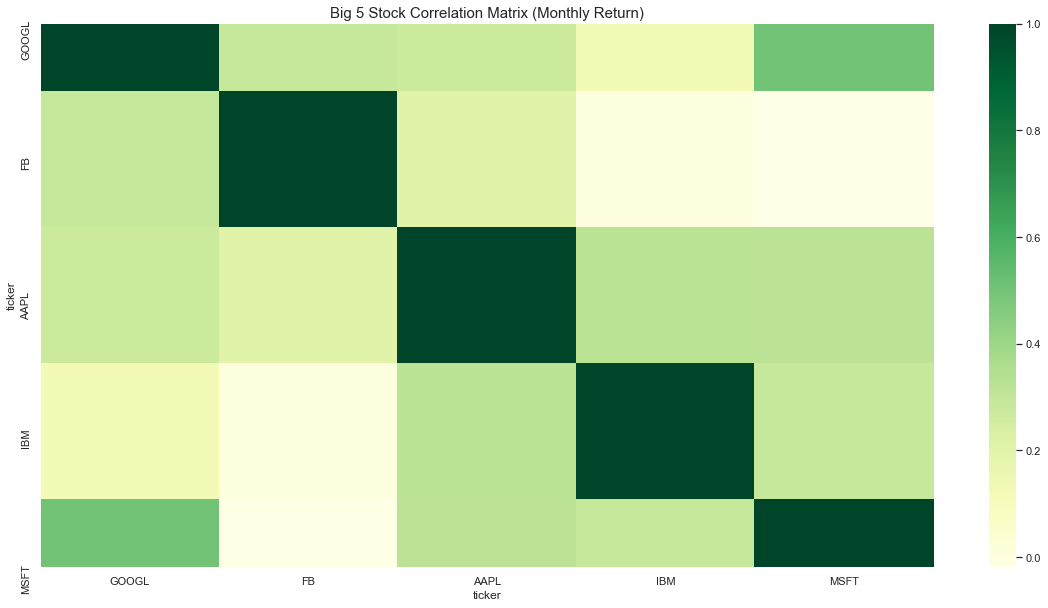

In [38]:
# Plot Big 5 Stock Correlation Matrix (Monthly Return)
plt.figure(figsize=(20, 10))
plt.title('Big 5 Stock Correlation Matrix (Monthly Return)', size = 15)
sns.heatmap(SP_500_monthly_returns_by_ticker_5_corr, cmap='YlGn')


In [39]:
# Monthly distribution of standard deviation.
SP_500_monthly_returns_by_ticker_std = SP_500_monthly_returns_by_ticker.std()
SP_500_monthly_returns_by_ticker_std


ticker
A       0.064544
AAL     0.107985
AAP     0.085371
AAPL    0.065719
ABBV    0.067002
          ...   
XYL     0.061550
YUM     0.069199
ZBH     0.057327
ZION    0.071836
ZTS     0.057444
Length: 505, dtype: float64

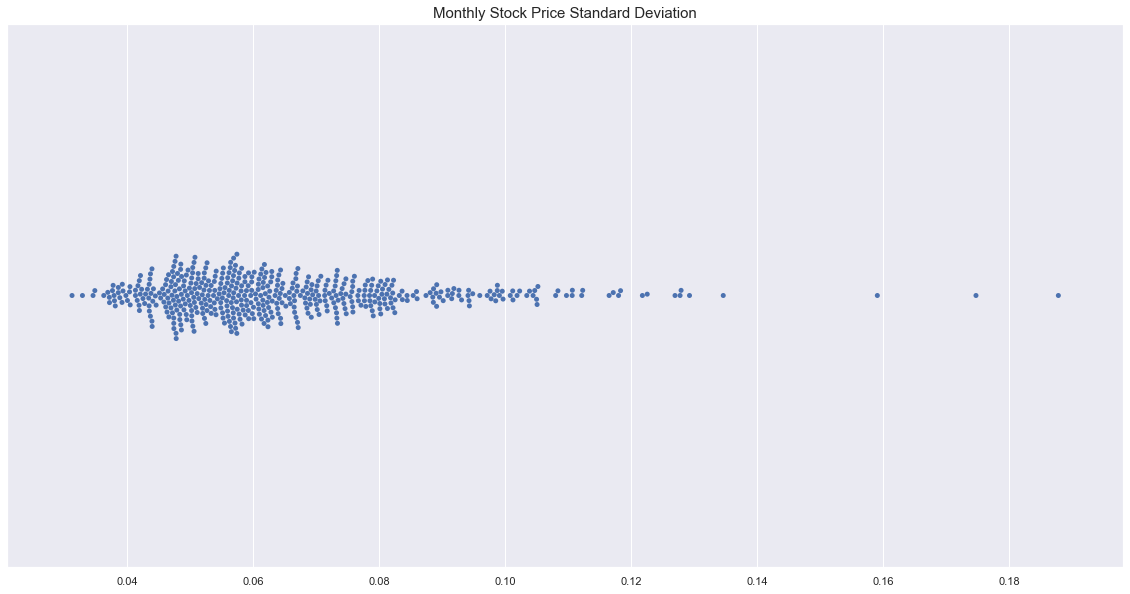

In [40]:
# Swarm Plot for Monthly Stock Price Standard Deviation
sns.set(rc={'figure.figsize':(20,10)})
plt.title('Monthly Stock Price Standard Deviation', size = 15)
sns.swarmplot(SP_500_monthly_returns_by_ticker_std)


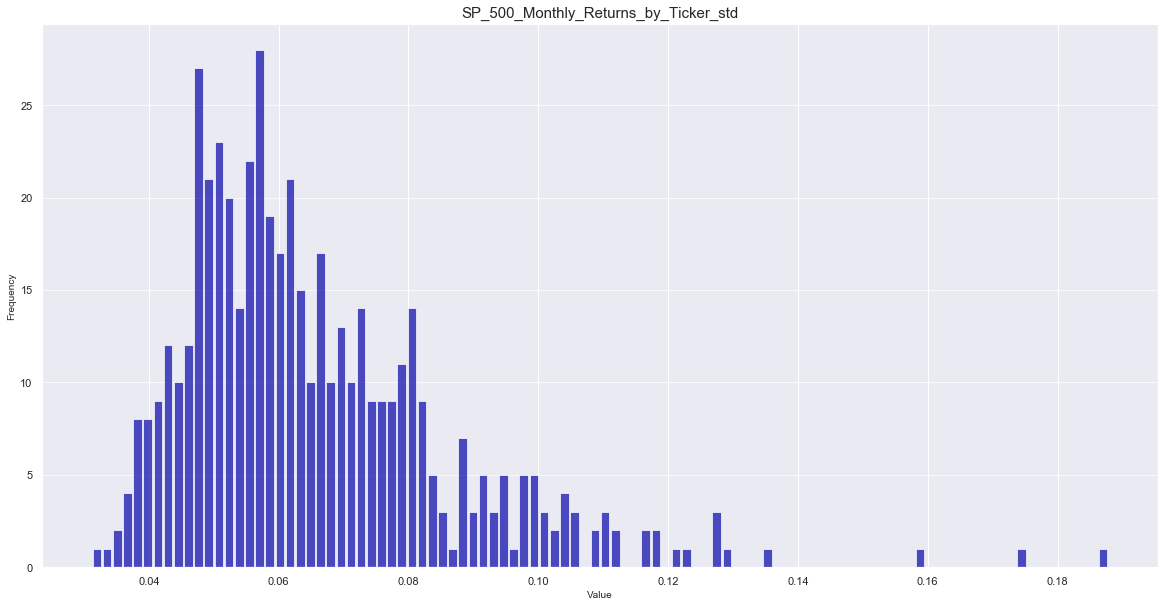

In [41]:
# Historical Graph Plot for Monthly Stock Price Standard Deviation
plt.figure(figsize=[20,10])
n, bins, patches = plt.hist(SP_500_monthly_returns_by_ticker_std, bins=100, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value', size=10)
plt.ylabel('Frequency', size=10)
plt.xticks()
plt.yticks()
plt.ylabel('Frequency', size=10)
plt.title('SP_500_Monthly_Returns_by_Ticker_std', size=15)
plt.show()


In [42]:
# Daily returns by Sector
SP_500_daily_data_by_sector = cleanDataset.pivot_table(values='close', index='date', columns='sector')
SP_500_daily_data_by_sector.index = pd.to_datetime(SP_500_daily_data_by_sector.index, dayfirst=True)
SP_500_daily_data_by_sector.sort_index(inplace=True)
SP_500_daily_returns_by_sector = SP_500_daily_data_by_sector.pct_change().dropna()
SP_500_daily_returns_by_sector


sector,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
date,,,,,,,,,,,
2013-02-11,-0.001586,-0.005960,-0.003563,-0.002699,-0.005266,0.002060,-0.002645,0.000003,0.000860,-0.002339,0.001255
2013-02-12,0.001407,0.006615,0.003826,0.001123,0.001019,0.004448,-0.002008,0.003866,0.003092,-0.000372,0.002899
2013-02-13,0.009410,-0.000173,0.000172,-0.000578,0.002967,0.002305,0.001311,0.002140,-0.002270,0.001678,-0.000896
2013-02-14,-0.004478,-0.006498,-0.005426,0.009655,0.005746,0.003676,-0.001865,0.000182,0.001763,0.001766,-0.008663
2013-02-15,0.001336,0.000074,0.000309,0.002667,-0.012895,-0.001419,-0.002661,0.002374,-0.001946,0.002260,0.002430
...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,-0.011869,-0.003628,-0.010516,-0.005692,0.007545,0.008325,-0.004128,-0.001345,-0.024872,-0.001385,-0.016517
2018-02-02,-0.024480,-0.012180,-0.012256,-0.023350,-0.035912,-0.020703,-0.016565,-0.018229,-0.008720,-0.030414,-0.007842
2018-02-05,-0.030506,-0.022967,-0.031770,-0.030750,-0.037121,-0.041966,-0.042666,-0.042021,-0.027124,-0.042767,-0.017892


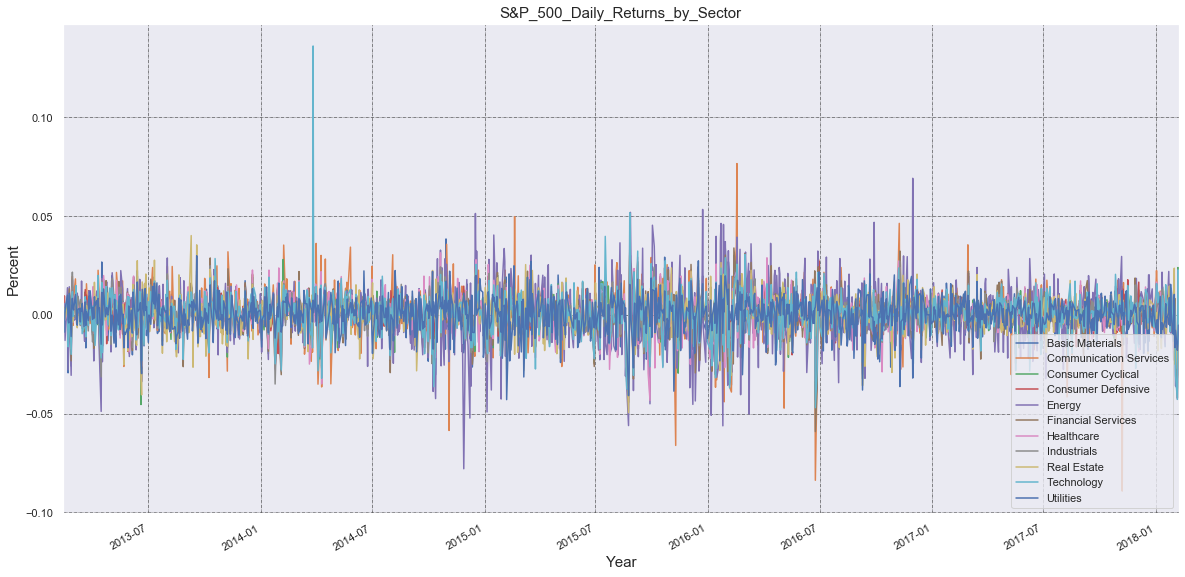

In [43]:
# Plot Daily Sector Return
SP_500_daily_returns_by_sector.plot(figsize=(20, 10))
plt.title('S&P_500_Daily_Returns_by_Sector', size=15)
plt.xlabel('Year', size=15)
plt.xticks()
plt.ylabel('Percent', size=15)
plt.yticks()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.legend(loc='lower right',)
plt.show()


In [44]:
# correlation of daily returns
SP_500_daily_returns_by_sector_corr = SP_500_daily_returns_by_sector.corr()
SP_500_daily_returns_by_sector_corr


sector,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
sector,,,,,,,,,,,
Basic Materials,1.000000,0.561089,0.732485,0.597639,0.665182,0.781106,0.668761,0.841109,0.464354,0.660922,0.334080
Communication Services,0.561089,1.000000,0.667014,0.477363,0.437592,0.601292,0.597042,0.615847,0.388391,0.623360,0.230740
Consumer Cyclical,0.732485,0.667014,1.000000,0.687334,0.534612,0.790673,0.729869,0.807012,0.536569,0.729414,0.349009
Consumer Defensive,0.597639,0.477363,0.687334,1.000000,0.382833,0.620220,0.588419,0.663019,0.610809,0.581309,0.573066
Energy,0.665182,0.437592,0.534612,0.382833,1.000000,0.591240,0.448860,0.624737,0.304131,0.483491,0.234673
Financial Services,0.781106,0.601292,0.790673,0.620220,0.591240,1.000000,0.723758,0.876020,0.478941,0.708636,0.287584
Healthcare,0.668761,0.597042,0.729869,0.588419,0.448860,0.723758,1.000000,0.727078,0.494383,0.695460,0.314097
Industrials,0.841109,0.615847,0.807012,0.663019,0.624737,0.876020,0.727078,1.000000,0.518393,0.741110,0.382985
Real Estate,0.464354,0.388391,0.536569,0.610809,0.304131,0.478941,0.494383,0.518393,1.000000,0.464262,0.627936


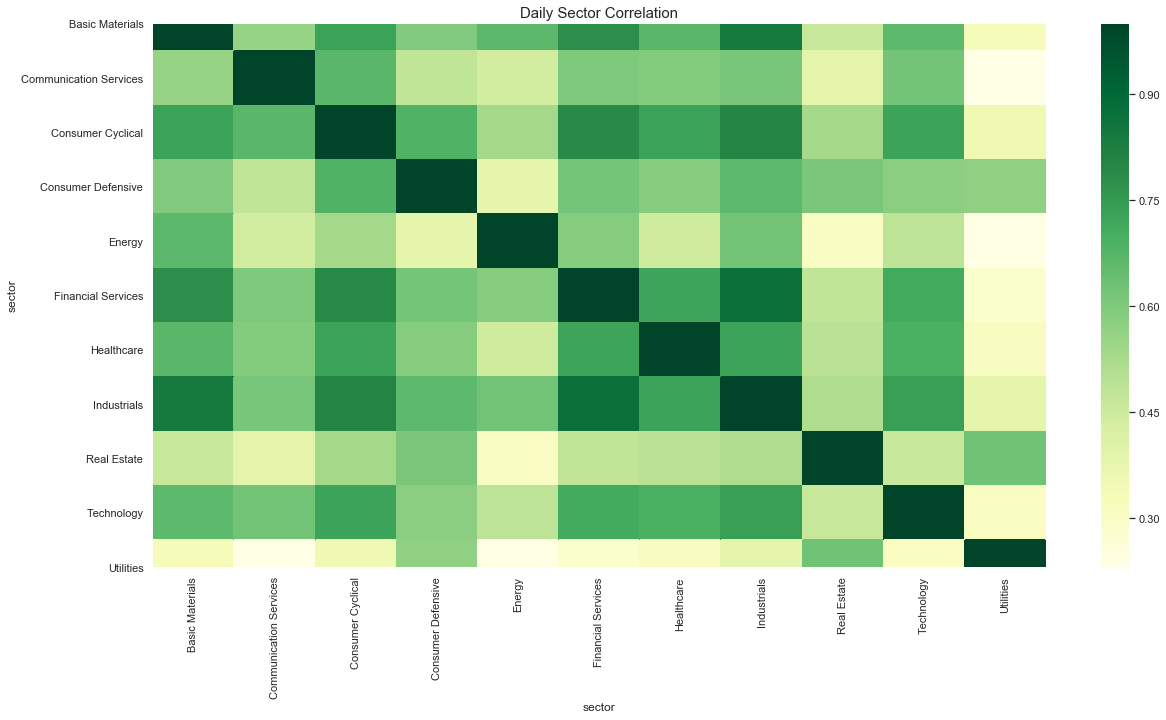

In [45]:
# Plot Daily Sector Correlation
plt.figure(figsize=(20, 10))
plt.title('Daily Sector Correlation', size = 15)
sns.heatmap(SP_500_daily_returns_by_sector_corr, cmap='YlGn')


In [46]:
# Daily distribution of standard deviation.
SP_500_daily_returns_by_sector_std = SP_500_daily_returns_by_sector.std().sort_values()
SP_500_daily_returns_by_sector_std


sector
Consumer Defensive        0.007196
Industrials               0.008536
Consumer Cyclical         0.008850
Utilities                 0.009017
Real Estate               0.009259
Healthcare                0.009653
Financial Services        0.009659
Basic Materials           0.009807
Technology                0.010391
Communication Services    0.012009
Energy                    0.014599
dtype: float64

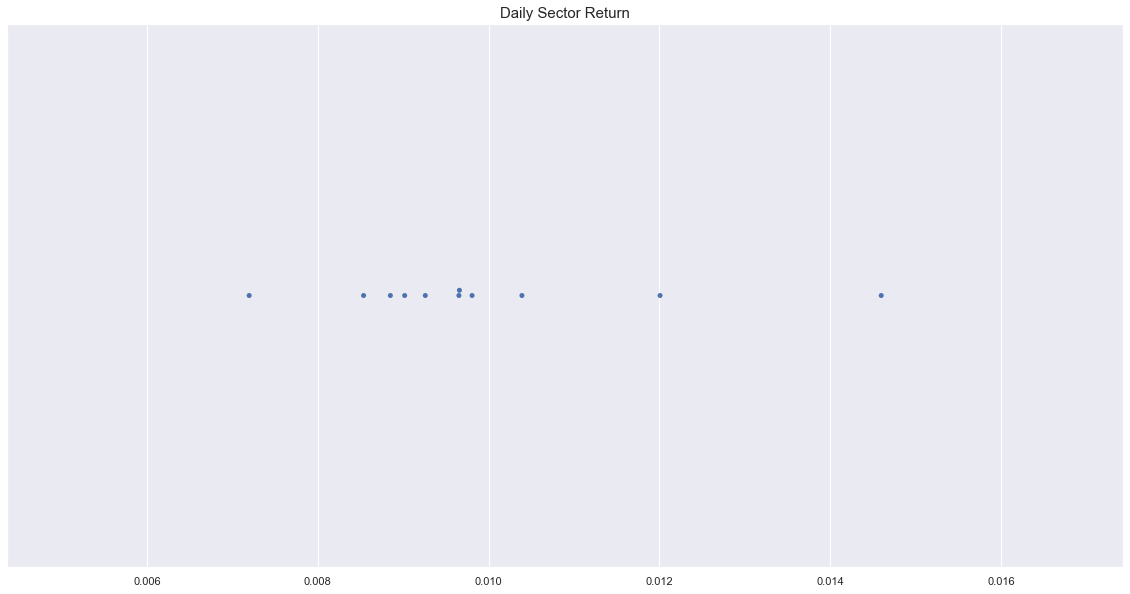

In [47]:
# Swarm Plot for Daily Sector Return
sns.set(rc={'figure.figsize':(20,10)})
plt.title('Daily Sector Return', size = 15)
sns.swarmplot(SP_500_daily_returns_by_sector_std)


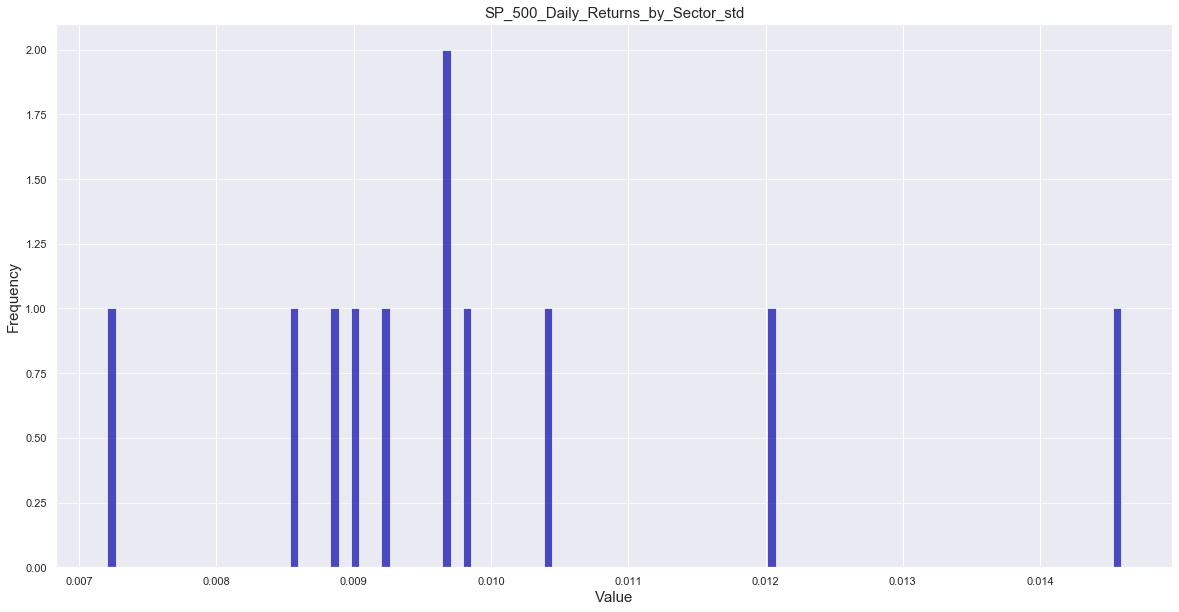

In [48]:
# Plot Daily Sector Return Standard Deviation
plt.figure(figsize=[20,10])
n, bins, patches = plt.hist(SP_500_daily_returns_by_sector_std, bins=100, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value', size=15)
plt.ylabel('Frequency', size=15)
plt.xticks()
plt.yticks()
plt.title('SP_500_Daily_Returns_by_Sector_std', size=15)
plt.show()


In [49]:
# Monthly returns by Sector
SP_500_monthly_returns_by_sector = SP_500_daily_data_by_sector.resample('BM').last()
SP_500_monthly_returns_by_sector = SP_500_monthly_returns_by_sector.pct_change().dropna()
SP_500_monthly_returns_by_sector


sector,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
date,,,,,,,,,,,
2013-03-29,0.021281,0.025435,0.033488,0.058478,0.033000,0.047283,0.045108,0.035521,0.015340,0.019804,0.047055
2013-04-30,0.005931,0.025556,0.033608,0.023593,-0.021474,0.019592,0.036687,-0.005273,0.059525,-0.003410,0.058671
2013-05-31,0.034547,0.075430,0.018553,-0.026389,0.029487,0.050833,0.035147,0.042024,-0.056394,0.034396,-0.085952
2013-06-28,-0.049429,0.026158,-0.033708,-0.018290,-0.023072,-0.007593,-0.011630,-0.020648,-0.019366,-0.023739,0.009312
2013-07-31,0.039774,0.042815,0.059392,0.044193,0.058898,0.059617,0.060909,0.059962,0.003841,0.068394,0.039735
2013-08-30,-0.015843,0.035256,-0.026172,-0.045289,0.012834,-0.043978,-0.024290,-0.023563,-0.065175,-0.020477,-0.057061
2013-09-30,0.049047,0.069018,0.051174,0.011032,0.039174,0.042792,0.056186,0.055812,0.031359,0.046421,0.004796
2013-10-31,0.032789,0.044826,0.060813,0.061283,0.048636,0.052523,0.030191,0.043876,0.017225,0.037206,0.039198
2013-11-29,0.010214,0.075953,0.036275,0.007465,-0.018493,0.040647,0.045593,0.026105,-0.048322,0.027098,-0.026640


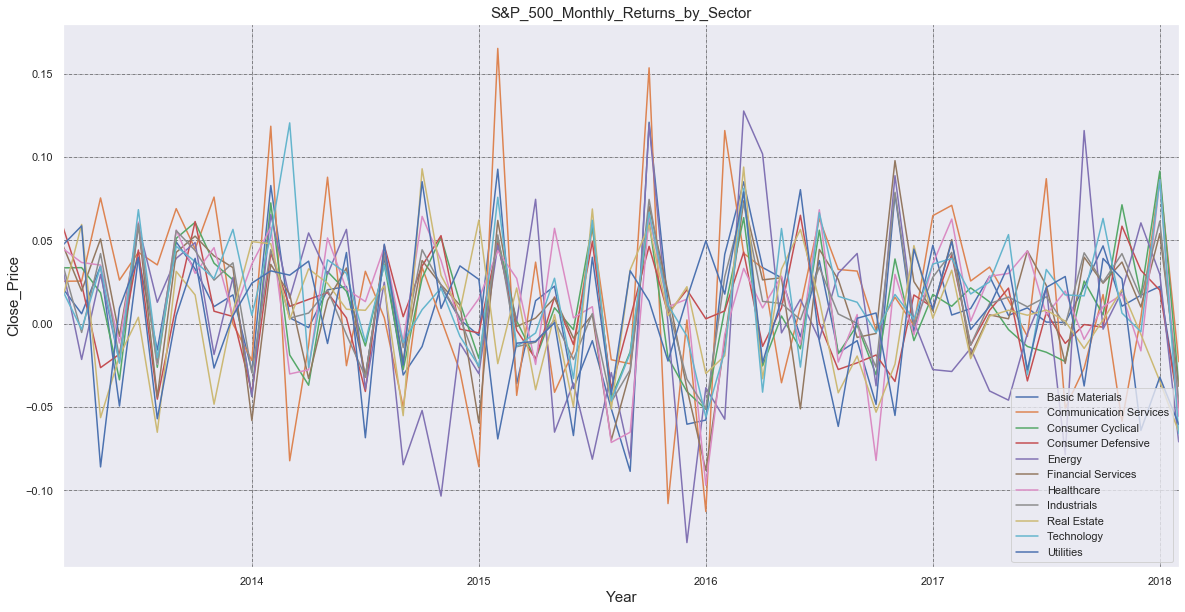

In [50]:
# Plot Monthly Sector Return
SP_500_monthly_returns_by_sector.plot(figsize=(20, 10))
plt.title('S&P_500_Monthly_Returns_by_Sector', size=15)
plt.xlabel('Year', size=15)
plt.xticks()
plt.ylabel('Close_Price', size=15)
plt.yticks()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.legend(loc='lower right')
plt.show()


In [51]:
# correlation of monthly returns
SP_500_monthly_returns_by_sector_corr = SP_500_monthly_returns_by_sector.corr()
SP_500_monthly_returns_by_sector_corr


sector,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
sector,,,,,,,,,,,
Basic Materials,1.000000,0.556733,0.699861,0.410602,0.629799,0.742826,0.630446,0.842182,0.231513,0.633081,0.040677
Communication Services,0.556733,1.000000,0.529837,0.251278,0.308792,0.471805,0.482870,0.553077,0.045372,0.405170,-0.110790
Consumer Cyclical,0.699861,0.529837,1.000000,0.615470,0.382352,0.753049,0.695249,0.811860,0.325466,0.660972,0.121725
Consumer Defensive,0.410602,0.251278,0.615470,1.000000,0.137523,0.398815,0.418364,0.541881,0.578604,0.454983,0.570333
Energy,0.629799,0.308792,0.382352,0.137523,1.000000,0.556224,0.187639,0.578546,0.031541,0.307106,-0.078737
Financial Services,0.742826,0.471805,0.753049,0.398815,0.556224,1.000000,0.651956,0.881916,0.167062,0.657159,-0.005258
Healthcare,0.630446,0.482870,0.695249,0.418364,0.187639,0.651956,1.000000,0.688700,0.416723,0.576830,0.116829
Industrials,0.842182,0.553077,0.811860,0.541881,0.578546,0.881916,0.688700,1.000000,0.281553,0.682010,0.115007
Real Estate,0.231513,0.045372,0.325466,0.578604,0.031541,0.167062,0.416723,0.281553,1.000000,0.293605,0.725875


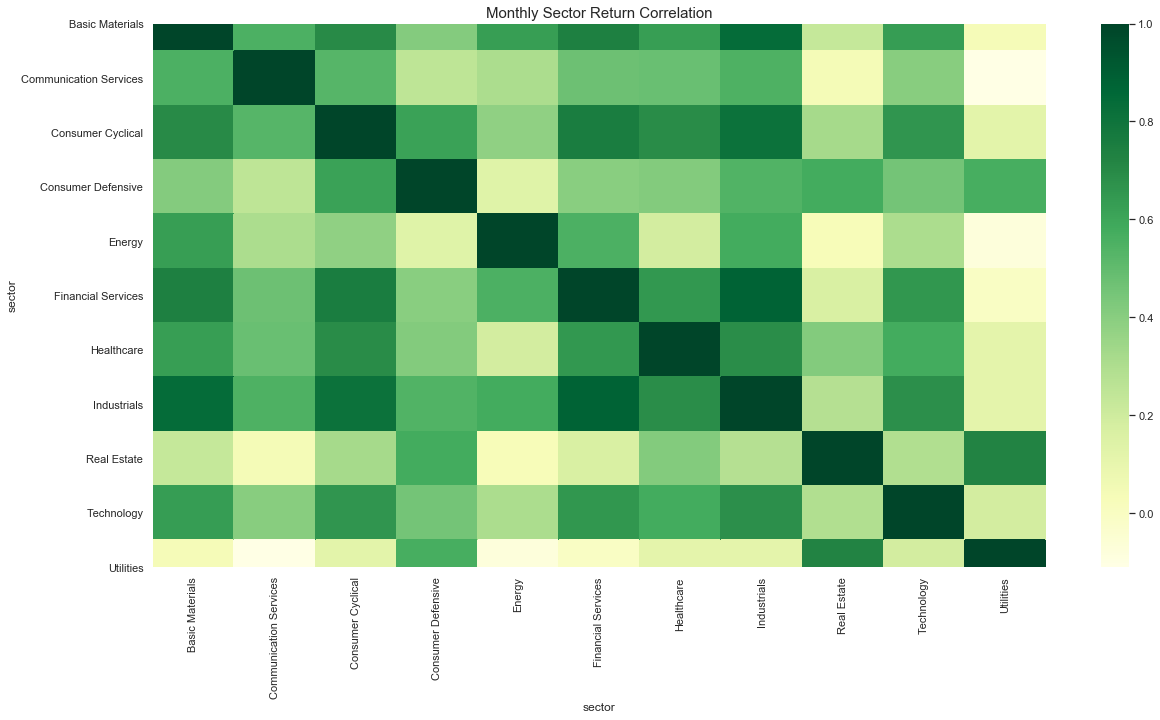

In [52]:
# Monthly Sector Return Correlation
plt.figure(figsize=(20, 10))
plt.title('Monthly Sector Return Correlation', size = 15)
sns.heatmap(SP_500_monthly_returns_by_sector_corr, cmap='YlGn')


In [53]:
# Monthly distribution of standard deviation.
SP_500_monthly_returns_by_sector_std = SP_500_monthly_returns_by_sector.std().sort_values()
SP_500_monthly_returns_by_sector_std


sector
Consumer Defensive        0.029630
Industrials               0.031706
Consumer Cyclical         0.035265
Real Estate               0.038164
Technology                0.038195
Healthcare                0.038377
Financial Services        0.038438
Basic Materials           0.039634
Utilities                 0.041104
Energy                    0.056284
Communication Services    0.057138
dtype: float64

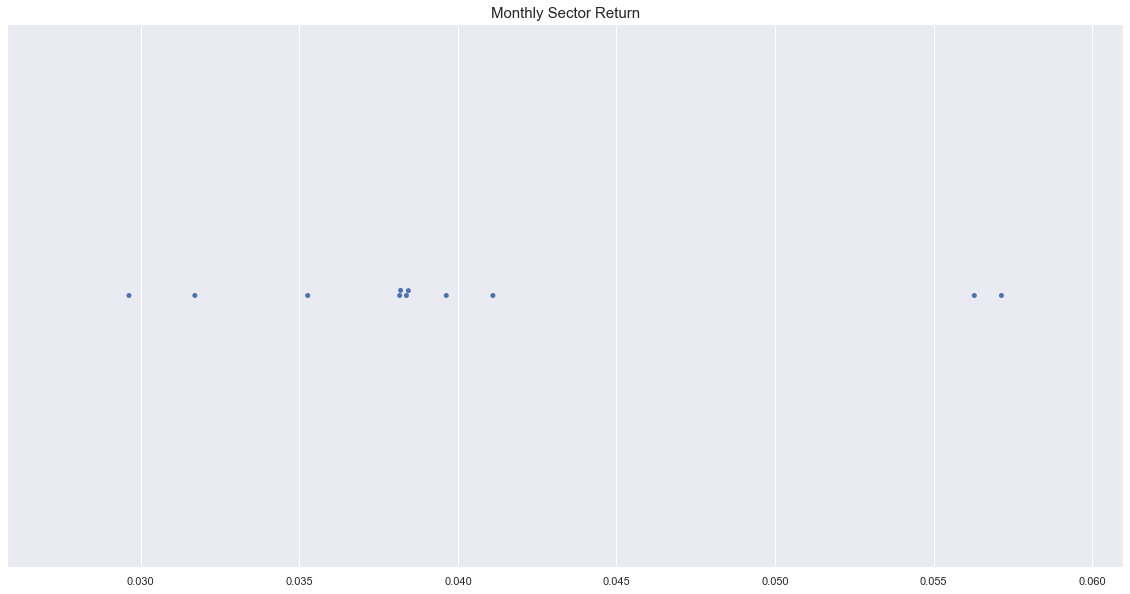

In [54]:
# Swarm Plot for Monthly Sector Return
sns.set(rc={'figure.figsize':(20,10)})
plt.title('Monthly Sector Return', size = 15)
sns.swarmplot(SP_500_monthly_returns_by_sector_std)


#### Observations/Comments:

Daily and monthly return calculations by Ticker level

- 5 Big Tech companies' daily returns fluctuate between -0.4 and 0.6 until 2014. After 2014 these numbers changes to -0.3 and 0.2. 
- Figures for monthly are -0.2 and 0.4 until 2014, after -0.1 and 0.2.
  - As seen from the graph, the significant change up to 2014 and thereafter is related to FB.
- The daily returns correlation graph shows a strong relation between MSFT & GOOGL and MSFT & AAPL. This relation in monthly returns changes to MSFT & GOOGL and GOOGL & FB.
- Daily returns for these 5 Big companies deviate between 0.03 and 0.07, but monthly returns between 0.03 and 0.04.

Daily and monthly return calculations by Sector level

- Sector level daily returns fluctuate between -0.3 and 0.2. 
- Figures for monthly returns are -0.1 and 0.1.
- Consumer Cyclical, Industrials, Financial Services, Healthcare and Technology sectors have strong correlation with 70-80% of all.
- Daily and monthly returns for sectors deviate between approximately 0.03 and 0.04.

#### Task 4: 
* Third question:If we are to select a stock by industry at random, what are the chances that it has positive return?
* Calculate percentage of stocks with positive return by industry over time.
* Which industry should we invest in for the most return? 
* If we pick the top 5 expensive stock in this industry, what is the monthly return over the period for these 5 stocks? 
* Is there any Seasonality for the monthend close price? 
* Is there autocorrelation of the monthend close prices of each of the 5 stocks? 
* Visualize the correlation between the returns of all pairs of stocks.

In [55]:
# Sort Positive Return for Sector Daily Return
df4=cleanDataset
df4['prev_rate'] = df4.groupby('ticker')['close'].shift(1)
df4["return"] = np.log( df4["close"] / df4["prev_rate"])
df4.loc[df4['return'] <= 0, 'Positive_Flag'] = 0 
df4.loc[df4['return'] > 0, 'Positive_Flag'] = 1
df4.dropna(how='any', inplace=True) 
df4['Positive_Flag'] = df4.Positive_Flag.astype(int)
df4.groupby('sector').mean().sort_values(by=['Positive_Flag'],ascending=False)


,close,prev_rate,return,Positive_Flag
sector,,,,
Technology,82.538647,82.481869,0.000674,0.530137
Utilities,52.690418,52.679533,0.000185,0.527177
Industrials,86.001293,85.950997,0.000536,0.526455
Financial Services,68.546437,68.508725,0.000540,0.525290
Healthcare,104.919422,104.859803,0.000571,0.523964
Real Estate,93.255158,93.238812,0.000133,0.523308
Consumer Defensive,68.337949,68.312652,0.000393,0.518624
Consumer Cyclical,83.418849,83.381439,0.000320,0.515772
Communication Services,189.402383,189.279075,0.000371,0.515609


In [56]:
# Sort Return for Sector Daily Return
df4.groupby('sector').mean().sort_values(by=['return'],ascending=False)


,close,prev_rate,return,Positive_Flag
sector,,,,
Technology,82.538647,82.481869,0.000674,0.530137
Healthcare,104.919422,104.859803,0.000571,0.523964
Financial Services,68.546437,68.508725,0.000540,0.525290
Industrials,86.001293,85.950997,0.000536,0.526455
Consumer Defensive,68.337949,68.312652,0.000393,0.518624
Communication Services,189.402383,189.279075,0.000371,0.515609
Consumer Cyclical,83.418849,83.381439,0.000320,0.515772
Basic Materials,86.726218,86.692354,0.000258,0.511556
Utilities,52.690418,52.679533,0.000185,0.527177


In [57]:
# Sort Date for Sector Daily Return
dfr=df4.groupby(['date','sector']).mean().sort_values(by=['date'],ascending=True)
dfr


close   prev_rate    return  \
date       sector                                                     
01-02-2016 Basic Materials          75.311000   75.199000  0.003732   
           Communication Services  161.357727  158.994091  0.008686   
           Consumer Cyclical        82.687388   82.165630  0.005270   
           Consumer Defensive       73.705541   73.202568  0.007383   
           Energy                   48.753226   49.814194 -0.024055   
...                                       ...         ...       ...   
31-12-2015 Financial Services       65.998000   66.578324 -0.008389   
           Healthcare              114.741387  115.656580 -0.008154   
           Industrials              81.411912   82.125726 -0.009234   
           Real Estate             101.775000  102.695769 -0.009765   
           Utilities                49.724464   50.319464 -0.008921   

                                   Positive_Flag  
date       sector                                 
01-02-2016 Basic Materials              0.500000  
           Communication Services       0.727273  
           Consumer Cyclical            0.688312  
           Consumer Defensive           0.756757  
           Energy                       0.129032  
...                                          ...  
31-12-2015 Financial Services           0.040541  
           Healthcare                   0.050000  
           Industrials                  0.069444  
           Real Estate                  0.000000  
           Utilities                    0.142857  

[13838 rows x 4 columns]

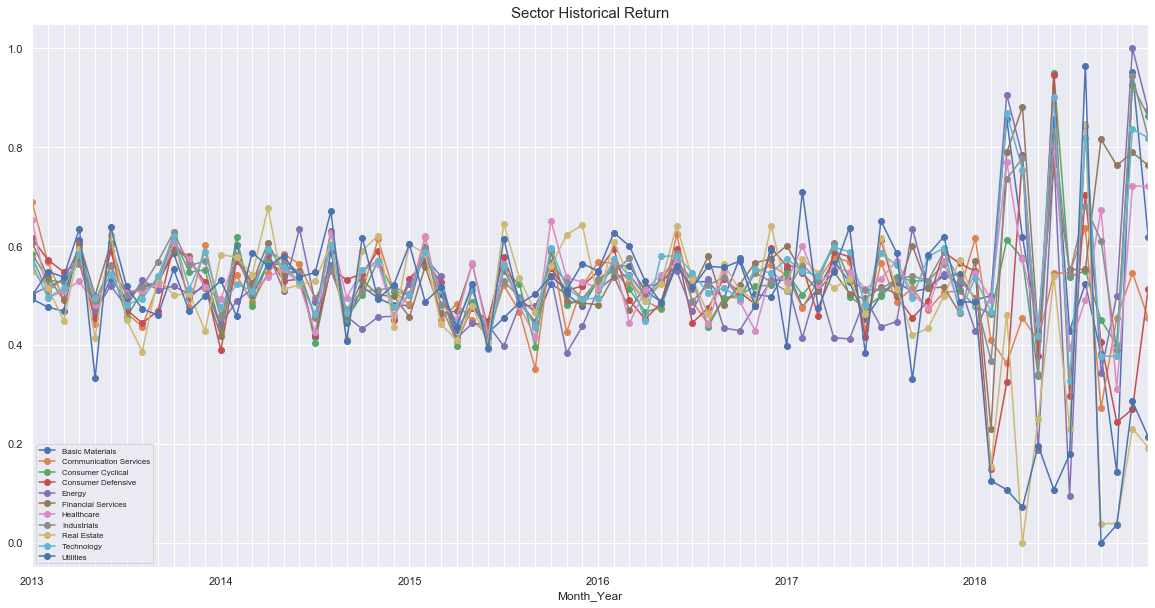

In [58]:
# Plot Sector Historical Return
dfr_2=dfr.reset_index()
dfr_2['date'] = pd.to_datetime(dfr_2['date'])
dfr_2['Month_Year'] = pd.to_datetime(dfr_2['date'], format='%m-%Y').dt.strftime('%m-%Y')
dfr_2['Month_Year'] = pd.to_datetime(dfr_2['Month_Year'])
dfr_2.pivot_table('Positive_Flag', 'Month_Year', 'sector', aggfunc='mean').plot(
          kind='line', marker='o', xticks=dfr_2.Month_Year.unique()).legend(loc=3, prop={'size': 8})
plt.title('Sector Historical Return', size = 15)
plt.gcf().set_size_inches(20, 10)


**Observations/Comments:**

- If we are to select a stock by sector at random, the chance we got a positive return stock is around 49.70% to 53.01% 
- We may invest in sector Technology for the most possible better return. 

In [59]:
# Sort Technology Stock Max Historical Close Price
df4.loc[df4['sector'] == 'Technology'].groupby('ticker')['close'].max().sort_values(ascending=False)


ticker
GOOGL    1187.56
GOOG     1175.84
AVGO      284.62
AYI       279.15
NVDA      246.85
          ...   
CSRA       33.69
JNPR       32.23
HPE        24.78
HPQ        23.91
AMD        15.20
Name: close, Length: 61, dtype: float64

In [60]:
# Display Sector Return Table
df4


,date,close,ticker,company name,sector,prev_rate,return,Positive_Flag
1,11-02-2013,14.46,AAL,American Airlines Group Inc.,Industrials,14.75,-0.019857,0
2,12-02-2013,14.27,AAL,American Airlines Group Inc.,Industrials,14.46,-0.013227,0
3,13-02-2013,14.66,AAL,American Airlines Group Inc.,Industrials,14.27,0.026963,1
4,14-02-2013,13.99,AAL,American Airlines Group Inc.,Industrials,14.66,-0.046780,0
5,15-02-2013,14.50,AAL,American Airlines Group Inc.,Industrials,13.99,0.035806,1
...,...,...,...,...,...,...,...,...
619035,01-02-2018,77.82,ZTS,Zoetis Inc. Class A,Healthcare,76.73,0.014106,1
619036,02-02-2018,76.78,ZTS,Zoetis Inc. Class A,Healthcare,77.82,-0.013454,0
619037,05-02-2018,73.83,ZTS,Zoetis Inc. Class A,Healthcare,76.78,-0.039179,0
619038,06-02-2018,73.27,ZTS,Zoetis Inc. Class A,Healthcare,73.83,-0.007614,0


In [61]:
# We will chose 'GOOGL','GOOG','AVGO','AYI' and 'NVDA' for further analysis
dfs = df4[['date','close', 'ticker']]
stocks = ['GOOGL','GOOG','AVGO','AYI','NVDA'] 
dfs_5 = dfs.loc[dfs['ticker'].isin(stocks)]
dfs_5['date'] = pd.to_datetime(dfs_5['date'])
dfs_5.set_index('date', inplace=True)

GOOGL = dfs_5.loc[dfs_5['ticker']=='GOOGL']['close']
GOOG = dfs_5.loc[dfs_5['ticker']=='GOOG']['close']
AVGO = dfs_5.loc[dfs_5['ticker']=='AVGO']['close']
AYI = dfs_5.loc[dfs_5['ticker']=='AYI']['close']
NVDA = dfs_5.loc[dfs_5['ticker']=='NVDA']['close']


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<Figure size 1440x720 with 0 Axes>

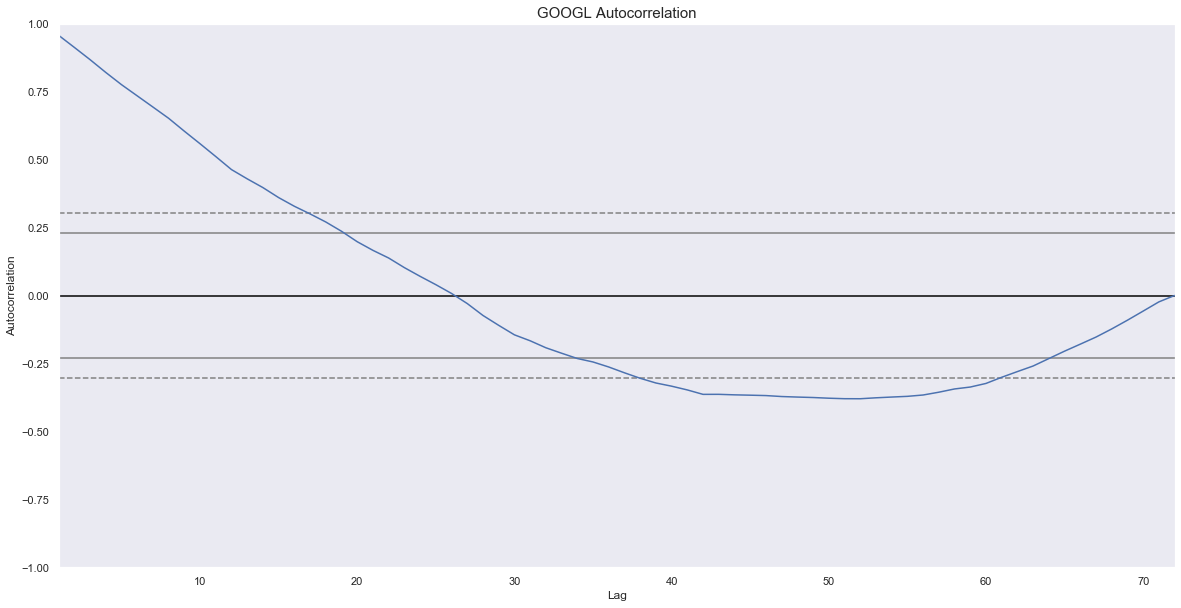

<Figure size 1440x720 with 0 Axes>

In [62]:
# Autocorrelation Plot for GOOGL Stock
GOOGL_monthend = GOOGL.resample('BM').last() 
np.set_printoptions(precision=4, suppress=True)
plt.rc('figure', figsize=(20, 10))
plt.figure()
autocorrelation_plot(GOOGL_monthend)
plt.title('GOOGL Autocorrelation', size = 15)
plt.figure()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'A Lag Plot with 1 period of lag')

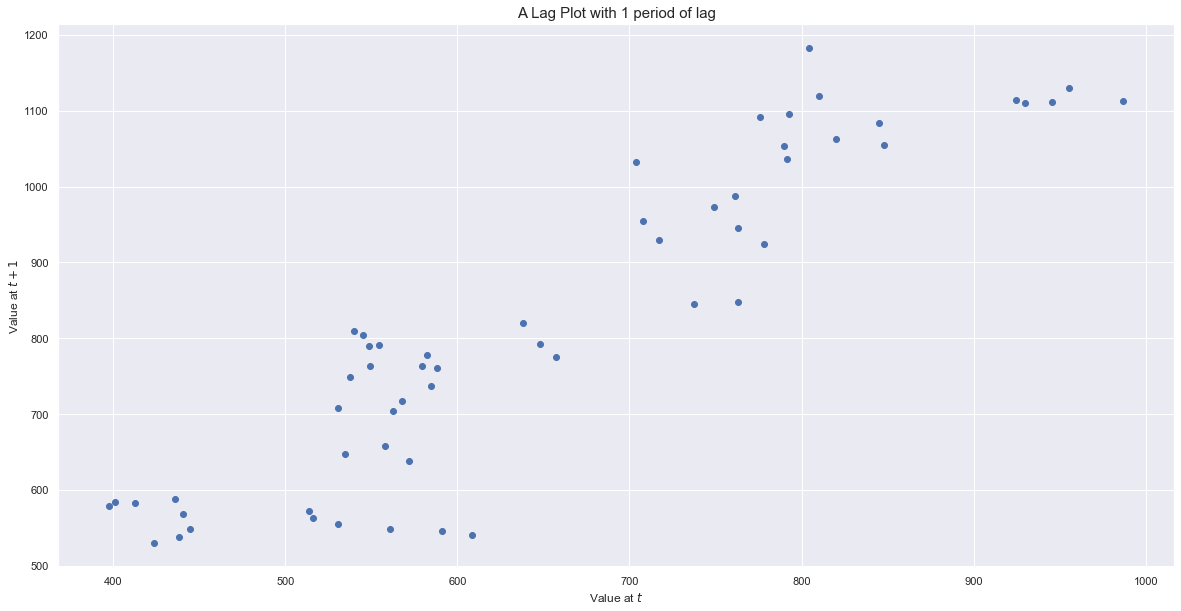

In [63]:
# Choose 16 month 
aLagPlot = pd.plotting.lag_plot(series=GOOGL_monthend, lag=16)
aLagPlot.set_ylabel("Value at ${t+1}$")
aLagPlot.set_xlabel("Value at $t$")
aLagPlot.set_title("A Lag Plot with 1 period of lag", size = 15)

# After 16-17 month, the correlation dropped uner 30% for GOOGL and there is no seasonality.

<Figure size 1440x720 with 0 Axes>

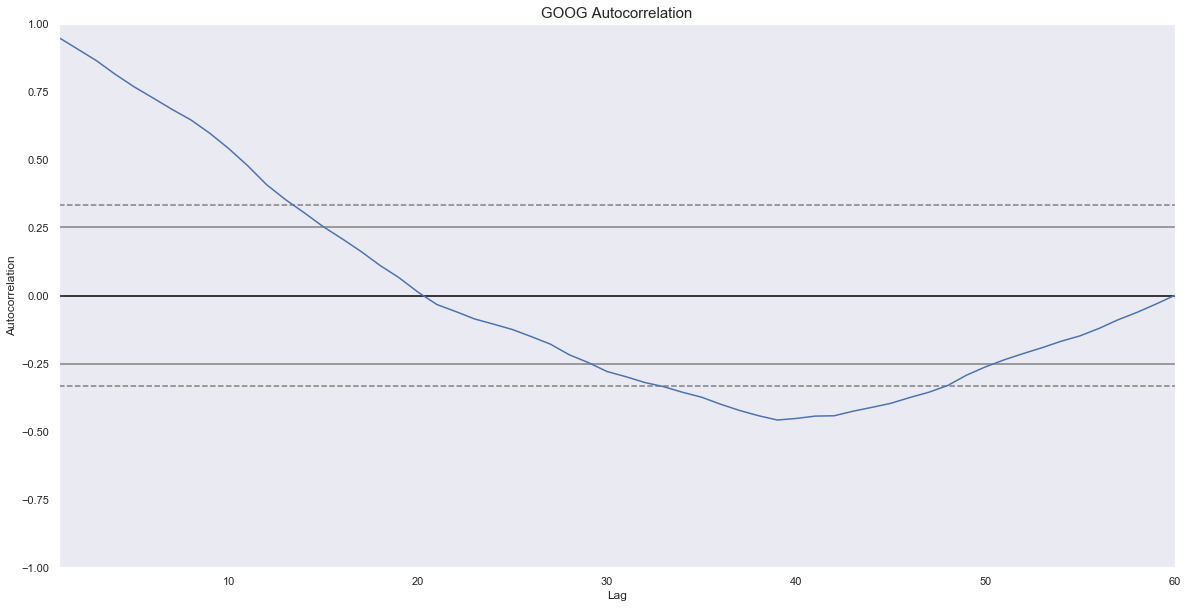

<Figure size 1440x720 with 0 Axes>

In [64]:
# Autocorrelation Plot for GOOG Stock
GOOG_monthend = GOOG.resample('BM').last() 
np.set_printoptions(precision=4, suppress=True)
plt.rc('figure', figsize=(20, 10))
plt.figure()
autocorrelation_plot(GOOG_monthend)
plt.title('GOOG Autocorrelation', size =15)
plt.figure()


<Figure size 1440x720 with 0 Axes>

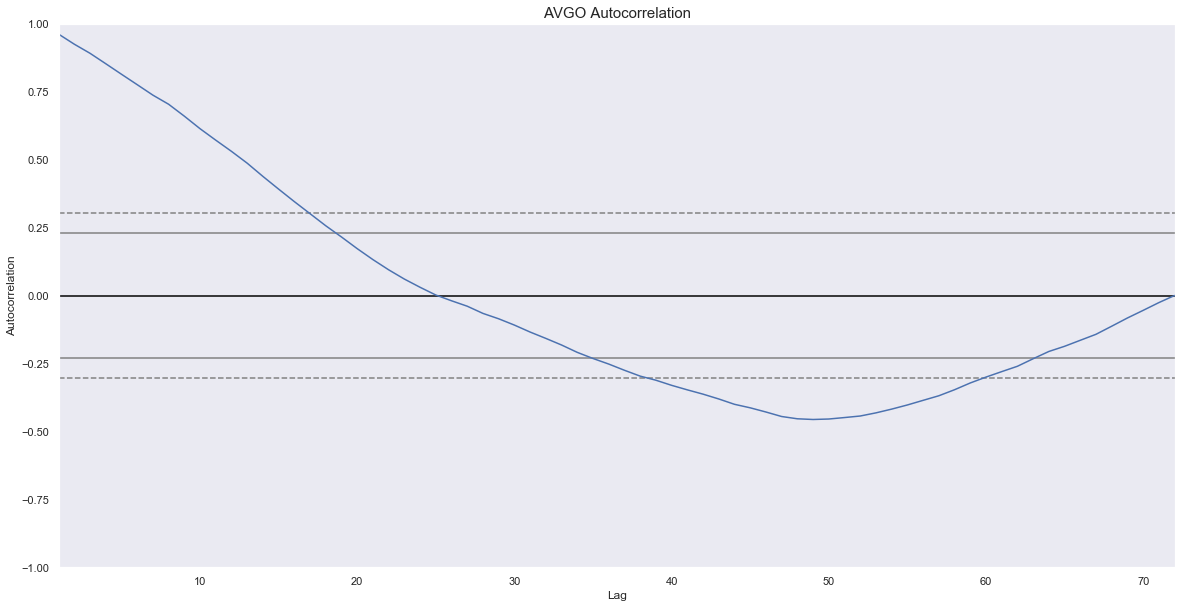

<Figure size 1440x720 with 0 Axes>

In [65]:
# Autocorrelation Plot for AVGO Stock
AVGO_monthend = AVGO.resample('BM').last() 
np.set_printoptions(precision=4, suppress=True)
plt.rc('figure', figsize=(20, 10))
plt.figure()
autocorrelation_plot(AVGO_monthend)
plt.title('AVGO Autocorrelation', size = 15)
plt.figure()


<Figure size 1440x720 with 0 Axes>

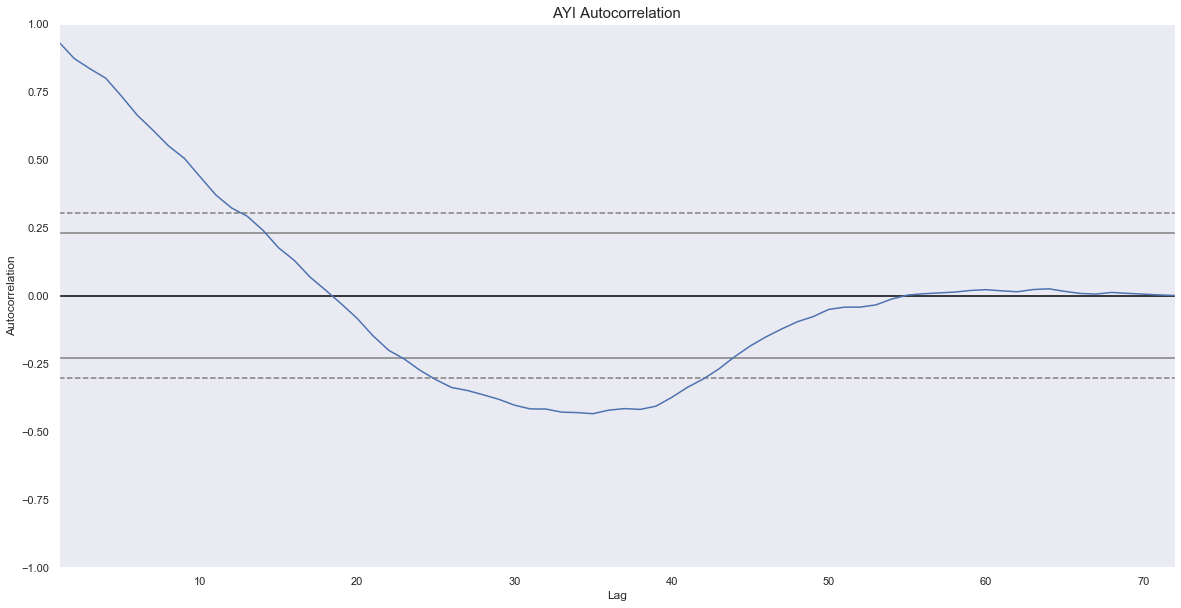

<Figure size 1440x720 with 0 Axes>

In [66]:
# Autocorrelation Plot for AYI Stock
AYI_monthend = AYI.resample('BM').last() 
np.set_printoptions(precision=4, suppress=True)
plt.rc('figure', figsize=(20, 10))
plt.figure()
autocorrelation_plot(AYI_monthend)
plt.title('AYI Autocorrelation', size = 15)
plt.figure()


<Figure size 1440x720 with 0 Axes>

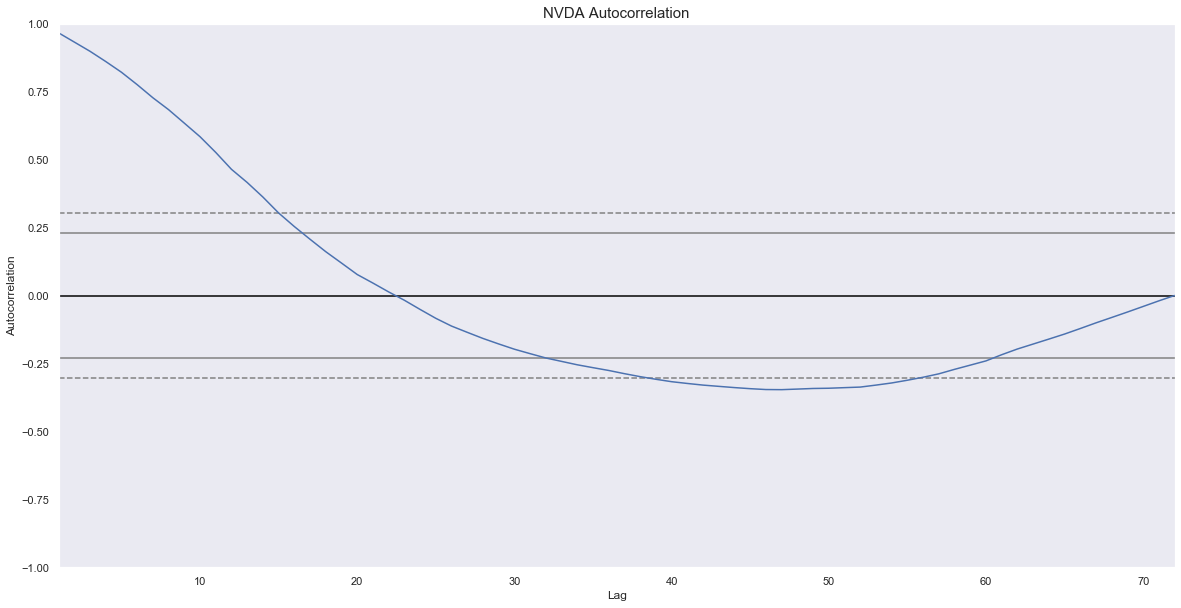

<Figure size 1440x720 with 0 Axes>

In [67]:
# Autocorrelation Plot for NVDA Stock
NVDA_monthend = NVDA.resample('BM').last() 
np.set_printoptions(precision=4, suppress=True)
plt.rc('figure', figsize=(20, 10))
plt.figure()
autocorrelation_plot(NVDA_monthend)
plt.title('NVDA Autocorrelation', size = 15)
plt.figure()


#### Observations/Comments:

- The other four stocks have the similar result, the correlation dropped under 30% after 12-16 months and there is no seasonality. 

#### Task 5:
* Fourth question: Is there a correlation between volatility and overall return?
* Calculate correlation of stock returns to volatility by industry

In [68]:
HistReturn = HistData.pct_change()+1
HistReturn.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,0.989352,0.980339,0.993536,1.010422,0.988966,0.997228,0.995641,0.996726,0.987730,1.008315,...,1.002479,0.998667,0.996276,0.999300,1.003769,1.013658,0.988515,0.997363,1.002900,1.006354
2013-02-12,1.000448,0.986860,1.002679,0.974933,0.988006,1.004277,1.001168,1.004106,1.006470,1.004123,...,1.003532,1.003203,1.002039,1.000700,0.996245,1.017844,1.003098,0.997224,1.011565,1.014432
2013-02-13,1.002913,1.027330,1.004707,0.998097,0.995765,0.993186,1.004665,1.002590,0.997943,0.999784,...,1.000352,1.005854,1.002374,1.004899,1.005025,1.011091,0.994749,1.007423,1.010208,0.994369
2013-02-14,0.996201,0.954297,0.998354,0.999101,1.036859,1.002787,1.006965,0.994154,0.994847,1.006053,...,0.992963,1.016931,0.998308,0.996054,1.003750,1.007431,0.991927,1.004474,0.995554,0.991654


In [125]:
stockReturn = HistReturn.prod(axis=0)-1
stockReturn

ticker
A       0.509760
AAL     2.484746
AAP     0.393283
AAPL    1.351218
ABBV    2.134345
          ...   
XYL     1.650055
YUM     0.227106
ZBH     0.592353
ZION    1.237780
ZTS     1.234796
Length: 505, dtype: float64

In [126]:
stockSTD = HistReturn.std(axis = 0, skipna = True)
stockSTD

ticker
A       0.015482
AAL     0.022456
AAP     0.018958
AAPL    0.014593
ABBV    0.016856
          ...   
XYL     0.013689
YUM     0.016509
ZBH     0.013098
ZION    0.016358
ZTS     0.014142
Length: 505, dtype: float64

In [127]:
ReturnVSTD = pd.concat([stockReturn*100, stockSTD], axis=1)
ReturnVSTD.columns=['Return', 'Volatility']
ReturnVSTD_v2 = pd.merge(ReturnVSTD, stockReference_v2, how="inner", left_on='ticker', right_on='ticker')
ReturnVSTD_v2 = ReturnVSTD_v2[["ticker", "Return", "Volatility", "sector"]]

for stock in ReturnVSTD_v2.index:
    if ReturnVSTD_v2["sector"][stock] != "Technology":
        ReturnVSTD_v2["sector"][stock] = "Other"
    
ReturnVSTD_v2.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ticker,Return,Volatility,sector
0,A,50.976043,0.015482,Other
1,AAL,248.474576,0.022456,Other
2,AAP,39.328264,0.018958,Other
3,AAPL,135.121776,0.014593,Technology
4,ABBV,213.434483,0.016856,Other


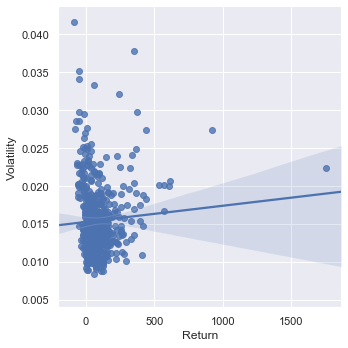

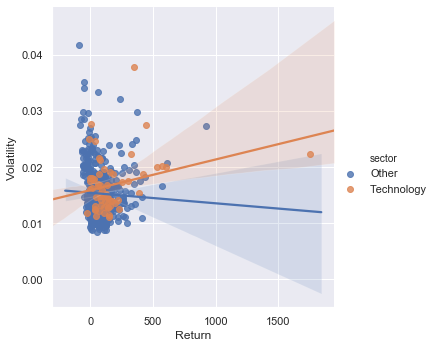

In [128]:
import seaborn as sns

sns.lmplot(x="Return", y="Volatility", data=ReturnVSTD_v2)
sns.lmplot(x="Return", y="Volatility", hue="sector", data=ReturnVSTD_v2)

#### Observations/Comments:

- It seems there is a weak positive correlation between volatility and return for SP500 stocks between the periods of 2013 and 2018
- The technology sector showed stronger positive correlation in comparison, which seemed to drag the remaining sectors from a negative correlation to positive
- Overall, the result suggests that investing in techology stocks with higher volatility may yield better returns

#### Task 6:
* Fifth question:Is there a correlation between days of loss until a day of positive return?
* Calculate days of loss until positive return and chi square of dataset to determine if they are dependent

Daily stock returns from the S&P500 for 1990-2018 can be used to assess whether stock activity each day is independent of the stock’s behavior on previous days.

We can label each day as Up or Down (D) depending on whether the market was up or down that day by calculating the price change (positive or negative). If the days really are independent, then the number of days until a positive trading day should follow a geometric distribution.

H0: The stock market being up or down on a given day is independent from all other days. Under this hypothesis, the number of days until an Up day should follow a geometric distribution.

HA: The stock market being up or down on a given day is not independent from all otherdays.

In [69]:
# Install  pandas_datareader
! pip install pandas_datareader

In [70]:
# Pull Data S&P 500 Adjust Close Price from Yahoo
import pandas_datareader.data as web
start = datetime.datetime(1990, 1, 1)
end = datetime.datetime(2018, 12, 31)
SP500_all = web.DataReader('^GSPC', 'yahoo', start, end)
#SP500_all.set_index('date', inplace=True)
SP500_all = SP500_all[['Adj Close']]
SP500_all['prev_rate']=SP500_all.shift(1)
SP500_all.fillna(0)


,Adj Close,prev_rate
Date,,
1990-01-02,359.690002,0.000000
1990-01-03,358.760010,359.690002
1990-01-04,355.670013,358.760010
1990-01-05,352.200012,355.670013
1990-01-08,353.790009,352.200012
...,...,...
2018-12-24,2351.100098,2416.620117
2018-12-26,2467.699951,2351.100098
2018-12-27,2488.830078,2467.699951


In [71]:
# Calculate the Stock Price Change
SP500_all["change"] = SP500_all["Adj Close"]-SP500_all["prev_rate"]
SP500_all.loc[SP500_all['change'] <= 0, 'UP_Flag'] = 0 
SP500_all.loc[SP500_all['change'] > 0, 'UP_Flag'] = 1
SP500_all.dropna(how='any', inplace=True) 
SP500_all['UP_Flag'] = SP500_all.UP_Flag.astype(int)
Up=SP500_all['UP_Flag'] .tolist()


In [72]:
# Calcualte S&P 500 Price Mean
SP500_all.mean()


Adj Close    1210.087126
prev_rate    1209.793236
change          0.293890
UP_Flag         0.533397
dtype: float64

In [73]:
# Generate the Continuous Positive Return Days
L1=len(Up) 
Up2=list(set(Up))
Up2.sort(reverse=False)
L2=len(Up2)

for m in range(L2):
  X=set() 
  start=Up.index(Up2[m])
  for n in range(L1):
    stop=L1
    if Up2[m] in tuple(Up)[start:stop]:
      a=Up.index(Up2[m],start,stop)
      X.add(a)
      start=start+1
    

In [74]:
# Calculate Observed Continuous Positive Return Days
s1 = list(X)
s1.insert(0,0) 
s2=[]
for i in range(len(s1)-1):
    b = s1[i+1] - s1[i]
    s2.append(b)
print(s2)


[3, 3, 3, 2, 1, 2, 6, 2, 1, 2, 2, 2, 1, 1, 6, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 2, 1, 7, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 5, 1, 3, 2, 1, 1, 4, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 3, 1, 3, 1, 5, 1, 1, 2, 1, 1, 3, 4, 1, 2, 2, 1, 1, 2, 3, 3, 1, 5, 3, 1, 1, 2, 2, 4, 1, 3, 1, 1, 2, 4, 2, 1, 1, 3, 1, 1, 2, 2, 1, 2, 2, 1, 3, 1, 1, 1, 3, 2, 4, 1, 2, 2, 2, 1, 7, 1, 2, 1, 1, 1, 3, 1, 1, 3, 1, 2, 1, 1, 2, 1, 2, 2, 1, 3, 1, 2, 2, 2, 6, 2, 3, 2, 1, 1, 4, 2, 2, 3, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 3, 1, 2, 3, 1, 2, 1, 2, 1, 1, 1, 1, 7, 2, 1, 4, 1, 3, 1, 2, 3, 1, 3, 1, 1, 3, 5, 2, 1, 1, 2, 2, 4, 1, 1, 4, 1, 1, 1, 3, 9, 1, 2, 2, 1, 1, 2, 4, 1, 5, 2, 1, 1, 1, 1, 2, 3, 3, 1, 1, 5, 1, 2, 1, 1, 3, 3, 3, 3, 4, 4, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 1, 2, 3, 2, 4, 2, 1, 4, 2, 4, 1, 2, 2, 4, 4, 1, 3, 1, 1, 2, 1, 4, 3, 1, 2, 1, 3, 1, 1, 1, 1, 3, 2, 3, 1, 1, 2, 4, 1, 2, 3, 1, 3, 2, 1, 2, 2, 2, 4, 1, 1, 4, 2, 3, 1, 2, 2, 2, 1, 1, 1, 1, 2, 3, 2, 3, 1, 1, 1, 1, 5, 

In [75]:
# Display the above Calculation Result
Counter(s2)


Counter({3: 458,
         2: 1014,
         1: 2020,
         6: 45,
         4: 244,
         7: 17,
         5: 93,
         9: 3,
         8: 2,
         10: 1})

Then we may get the following results for further analysis: 

|Days|1|2|3|4|5|6|7+|Total|
|------|------|-----|-----|-----|-----|-----|----|------|
|Observed| 2020| 1014| 458| 244|  93| 45| 23| 3897|

The S&P500 was positive on 53.34% of those days.

In [76]:
# Calculate the Expected Numbers of Positive Return Days
obs_nd = [2020, 1014, 458, 244, 93, 45, 23]
total_days = sum(obs_nd)
p = 0.5334
expected_values =[]

for days in range(6):
    expected_values.append(round(p*(1-p)**days*total_days,0))
expected_values.append(round((1-stats.geom.cdf(6,p))*total_days,0))
print('The expected values are: ', expected_values)


The expected values are:  [2079.0, 970.0, 453.0, 211.0, 99.0, 46.0, 40.0]


In [77]:
# Chi Square Test
chi_testbook = chisquare(obs_nd, expected_values)
print('Chis-square value is: ', chi_testbook.statistic)
print('p-value: ', chi_testbook.pvalue)


Chis-square value is:  16.496939535821003
p-value:  0.01132121004722022


#### Observations/Comments:

- p value is around 0.01 which is smaller than significance test 0.05, so the H0 can be rejected.
- The stock market being up or down on a given day is not independent from all other days.

#### Task 7: 
* Seventh question: Is there seasonality in the data? (sector level does Sector perform welll during certain period)
* Find seasonality effect using lag plot or autocorrelation functions.

In [78]:
###############################
# Stock Price & Return (Daily)

# Calculate Daily Return
DailyReturn = HistData.pct_change()
DailyReturn.head()


ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,-0.010648,-0.019661,-0.006464,0.010422,-0.011034,-0.002772,-0.004359,-0.003274,-0.012270,0.008315,...,0.002479,-0.001333,-0.003724,-0.000700,0.003769,0.013658,-0.011485,-0.002637,0.002900,0.006354
2013-02-12,0.000448,-0.013140,0.002679,-0.025067,-0.011994,0.004277,0.001168,0.004106,0.006470,0.004123,...,0.003532,0.003203,0.002039,0.000700,-0.003755,0.017844,0.003098,-0.002776,0.011565,0.014432
2013-02-13,0.002913,0.027330,0.004707,-0.001903,-0.004235,-0.006814,0.004665,0.002590,-0.002057,-0.000216,...,0.000352,0.005854,0.002374,0.004899,0.005025,0.011091,-0.005251,0.007423,0.010208,-0.005631
2013-02-14,-0.003799,-0.045703,-0.001646,-0.000899,0.036859,0.002787,0.006965,-0.005846,-0.005153,0.006053,...,-0.007037,0.016931,-0.001692,-0.003946,0.003750,0.007431,-0.008073,0.004474,-0.004446,-0.008346


In [79]:
# Check Potential NaN at Each Column
DailyReturn.isnull().sum().unique()


array([   1,  197, 1216, 1117, 1108,  410,   87,  699, 1151, 1045,  963,
         91,  856,  285,  984,  679,  343,   63,  605,  300,  479,  372,
        796,  732,  598], dtype=int64)

In [80]:
#############################
# Stock Return (Monthly)

# Generate Month End Historical Stock Price
HistData_MonthEnd = HistData.resample('BM').last()
HistData_MonthEnd.head()


ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-28,41.48,13.43,76.34,63.0571,36.92,47.20,33.79,74.36,39.310,45.22,...,28.64,37.27,89.55,41.42,32.44,27.50,65.48,74.96,24.15,33.45
2013-03-29,41.97,16.97,82.65,63.2371,40.78,51.45,35.32,75.97,43.515,46.49,...,30.30,38.17,90.11,42.44,34.40,27.56,71.94,75.22,24.99,33.40
2013-04-30,41.44,16.90,83.88,63.2542,46.05,54.12,36.92,81.44,45.080,43.99,...,31.14,37.91,88.99,42.35,34.32,27.75,68.12,76.45,24.62,33.02
2013-05-31,45.45,17.57,81.52,64.2478,42.69,54.08,36.67,82.11,42.910,45.93,...,31.43,40.65,90.47,41.76,35.16,28.14,67.75,78.51,28.07,32.00
2013-06-28,42.76,16.42,81.17,56.6471,41.34,55.83,34.88,71.96,45.560,45.06,...,30.32,39.61,90.35,40.96,36.28,26.94,69.34,74.94,28.92,30.89


In [81]:
# Calculate Monthly Return
MonthlyReturn = HistData_MonthEnd.pct_change()
MonthlyReturn.head()


ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-29,0.011813,0.263589,0.082657,0.002855,0.104550,0.090042,0.045280,0.021651,0.106970,0.028085,...,0.057961,0.024148,0.006253,0.024626,0.060419,0.002182,0.098656,0.003469,0.034783,-0.001495
2013-04-30,-0.012628,-0.004125,0.014882,0.000270,0.129230,0.051895,0.045300,0.072002,0.035965,-0.053775,...,0.027723,-0.006812,-0.012429,-0.002121,-0.002326,0.006894,-0.053100,0.016352,-0.014806,-0.011377
2013-05-31,0.096766,0.039645,-0.028135,0.015708,-0.072964,-0.000739,-0.006771,0.008227,-0.048137,0.044101,...,0.009313,0.072276,0.016631,-0.013932,0.024476,0.014054,-0.005432,0.026946,0.140130,-0.030890
2013-06-28,-0.059186,-0.065452,-0.004293,-0.118303,-0.031623,0.032359,-0.048814,-0.123615,0.061757,-0.018942,...,-0.035317,-0.025584,-0.001326,-0.019157,0.031854,-0.042644,0.023469,-0.045472,0.030281,-0.034687


In [82]:
# Check Potential NaN at Each Column
MonthlyReturn.isnull().sum().unique()


array([ 1, 10, 59, 54, 20,  5, 34, 56, 51, 47, 42, 14, 48, 33, 17,  4, 30,
       15, 24, 18, 39, 36, 29], dtype=int64)

In [83]:
#############################
# Sector Return (Daily)

# Create Sector Dictionary
SectorDict = {}
for name in SectorName:
    tickers =[]
    for pos in range(len(TickerSector.index)):
        if TickerSector.index[pos][1] == name:
            tickers.append(TickerSector.index[pos][0])
    SectorDict[name] = tickers
SectorDict


{'Industrials': ['AAL',
  'ADP',
  'ALK',
  'ALLE',
  'AME',
  'AOS',
  'ARNC',
  'AVY',
  'BA',
  'CAT',
  'CHRW',
  'CMI',
  'COL',
  'CSX',
  'CTAS',
  'DAL',
  'DE',
  'DOV',
  'EFX',
  'EMR',
  'ETN',
  'EXPD',
  'FAST',
  'FDX',
  'FIS',
  'FISV',
  'FLR',
  'FLS',
  'GD',
  'GE',
  'GPN',
  'GWW',
  'HII',
  'HON',
  'INFO',
  'IR',
  'IRM',
  'ITW',
  'JBHT',
  'JCI',
  'JEC',
  'KSU',
  'LLL',
  'LMT',
  'LUV',
  'MMM',
  'NLSN',
  'NOC',
  'NSC',
  'PAYX',
  'PCAR',
  'PH',
  'PNR',
  'PWR',
  'RHI',
  'ROK',
  'ROP',
  'RSG',
  'RTN',
  'SNA',
  'SRCL',
  'SWK',
  'TDG',
  'TXT',
  'UAL',
  'UNP',
  'UPS',
  'URI',
  'UTX',
  'VRSK',
  'WM',
  'XYL'],
 'Technology': ['AAPL',
  'ACN',
  'ADBE',
  'ADI',
  'ADSK',
  'AKAM',
  'AMAT',
  'AMD',
  'ANSS',
  'APH',
  'ATVI',
  'AVGO',
  'AYI',
  'CA',
  'CDNS',
  'CERN',
  'CRM',
  'CSCO',
  'CSRA',
  'CTSH',
  'CTXS',
  'DXC',
  'EA',
  'FB',
  'FFIV',
  'FLIR',
  'FTV',
  'GLW',
  'GOOG',
  'GOOGL',
  'GRMN',
  'HPE',
  'HPQ',
 

In [84]:
# Create Daily Sector Return
DailySectorReturn = pd.DataFrame(index=DailyReturn.index)
for name in SectorName:
    DailySectorReturn[name] = pd.DataFrame(DailyReturn[SectorDict[name]]).mean(axis=1, skipna=True)

DailySectorReturn = DailySectorReturn.dropna()
DailySectorReturn.head()


,Industrials,Technology,Consumer Cyclical,Healthcare,Consumer Defensive,Financial Services,Utilities,Real Estate,Basic Materials,Communication Services,Energy
date,,,,,,,,,,,
2013-02-11,-0.000030,0.000175,-0.003309,-0.003244,-0.002462,0.001879,0.001916,0.001655,-0.002639,-0.004284,-0.005201
2013-02-12,0.002455,0.001027,0.005658,-0.001584,0.000560,0.005566,0.003585,0.005531,0.006308,0.004038,0.000557
2013-02-13,0.004158,0.002232,-0.000416,-0.000036,-0.000322,0.001401,-0.001051,-0.001391,0.009308,0.000566,0.005699
2013-02-14,-0.000760,0.003404,-0.003015,0.001015,0.012840,0.002725,-0.008328,-0.001965,-0.004212,-0.020222,0.004434
2013-02-15,0.002440,-0.000286,0.002898,-0.000744,0.004491,-0.001837,0.001964,-0.000234,-0.001031,0.006708,-0.013316


In [85]:
#############################
# Sector Return (Monthly)

# Create Monthly Sector Return
MonthlySectorReturn = pd.DataFrame(index=MonthlyReturn.index)
for name in SectorName:
    MonthlySectorReturn[name] = pd.DataFrame(MonthlyReturn[SectorDict[name]]).mean(axis=1, skipna=True)

MonthlySectorReturn = MonthlySectorReturn.dropna()
MonthlySectorReturn.head()


,Industrials,Technology,Consumer Cyclical,Healthcare,Consumer Defensive,Financial Services,Utilities,Real Estate,Basic Materials,Communication Services,Energy
date,,,,,,,,,,,
2013-03-29,0.046536,0.023847,0.045372,0.045394,0.065582,0.050991,0.051736,0.020096,0.020945,0.049793,0.034769
2013-04-30,-0.007232,0.005541,0.036695,0.025102,0.024938,0.016707,0.059982,0.059883,-0.011300,0.040435,-0.021222
2013-05-31,0.039704,0.046843,0.027700,0.037831,-0.026550,0.057127,-0.089037,-0.057295,0.038121,-0.015190,0.029180
2013-06-28,-0.028324,-0.013947,-0.006533,-0.005676,0.003283,0.000977,0.007319,-0.018759,-0.056201,0.024404,-0.029340
2013-07-31,0.064843,0.081158,0.055960,0.066713,0.046032,0.058223,0.038798,0.005901,0.039013,0.027427,0.062167


In [86]:
#############################
# S&P 500 Return (Daily)

# Create Daily S&P 500 Return
DailySP500Return = pd.DataFrame(index=DailyReturn.index)
DailySP500Return = pd.DataFrame(DailyReturn).mean(axis=1, skipna=True)

DailySP500Return = DailySP500Return.dropna()
DailySP500Return.head()


date
2013-02-11   -0.001137
2013-02-12    0.002904
2013-02-13    0.001617
2013-02-14    0.000336
2013-02-15    0.000080
dtype: float64

In [87]:
#############################
# S&P 500 Return (Monthly)

# Creat Monthly S&P 500 Return
DailySP500Return_MonthEnd = DailySP500Return.resample('BM').last()
DailySP500Return_MonthEnd.head()


date
2013-02-28    0.000657
2013-03-29    0.006929
2013-04-30    0.004380
2013-05-31   -0.012977
2013-06-28   -0.003138
Freq: BM, dtype: float64

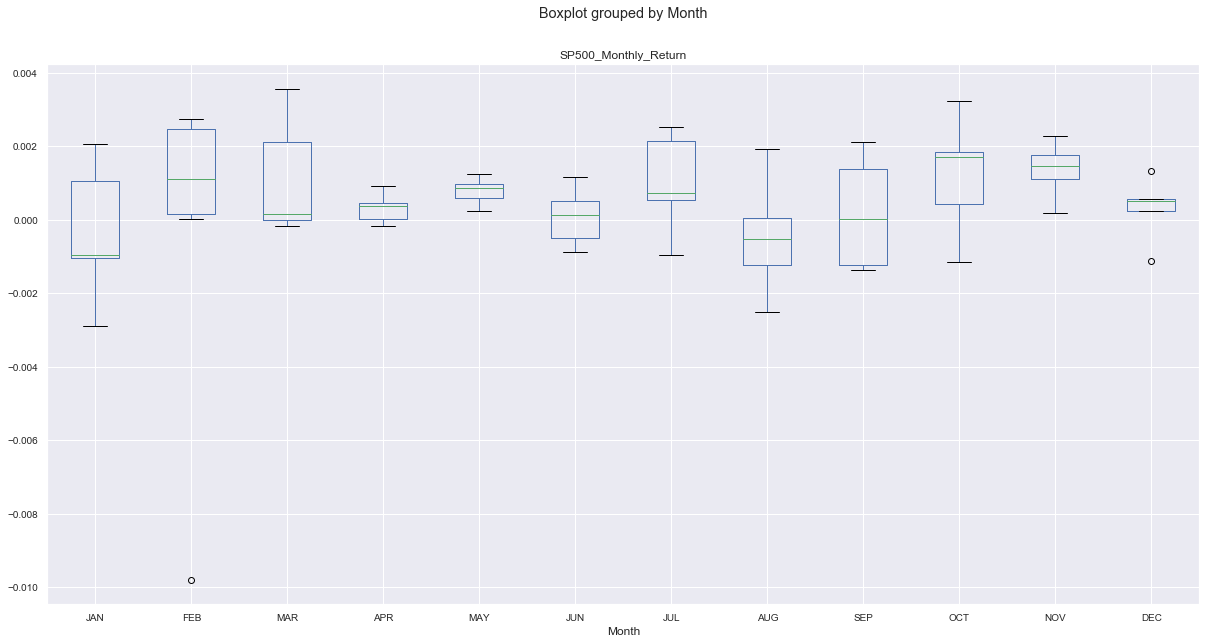

In [88]:
########################################
# 1. S&P 500 Seasonality Analysis:

# Boxplot Grouped by Month for SP500
Monthly_Returns_SP500 = DailySP500Return.groupby([DailySP500Return.index.year.rename('year'), 
                                               DailySP500Return.index.month.rename('month')]).mean()
rcParams['figure.figsize'] = 20,10
Monthly_Returns_List = []
for i in range(len(Monthly_Returns_SP500)):
    Monthly_Returns_List.append({'Year':Monthly_Returns_SP500.index[i][0],'Month':Monthly_Returns_SP500.index[i][1],
                                 'SP500_Monthly_Return': Monthly_Returns_SP500[i]})
Monthly_Returns_List = pd.DataFrame(Monthly_Returns_List, columns=('Year','Month','SP500_Monthly_Return'))
Monthly_Returns_List.boxplot(column='SP500_Monthly_Return', by='Month')
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
ax.set_xticklabels(labels)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


#### Observations/Comments:

* Overall S&P 500 market return trend exhibits a wave like pattern: market returns seem to increase from January to February followed by decrease in average returns in March to June. August to December exhibits steady increase in market returns.
* Highest range of return (high to low range of box plot) in the past 6 years occured in February, July, August, and September.
* March & October demonstrate low donwside trade probability as low part of the box plot is closely situated outside the first quantile of the data. 
    - Therefore, it might provide good opportunity for investor to get in market or add to their investments. 
    - However, proper backtesting is needed to prove this hypothesis.
* January & December demonstrate low upside trade probability as upper part of the box plot is closely situated outside the third quantile of the data. 
    - Therefore, it might provide good opportunity for investor to get off market or sell their investments. 
    - However, proper backtesting is needed to prove this hypothesis.
* Months of April and May provide the smallest quarterfinal range (IQR). Coincidentally, the aforementioned months are half year and end of the trading year.

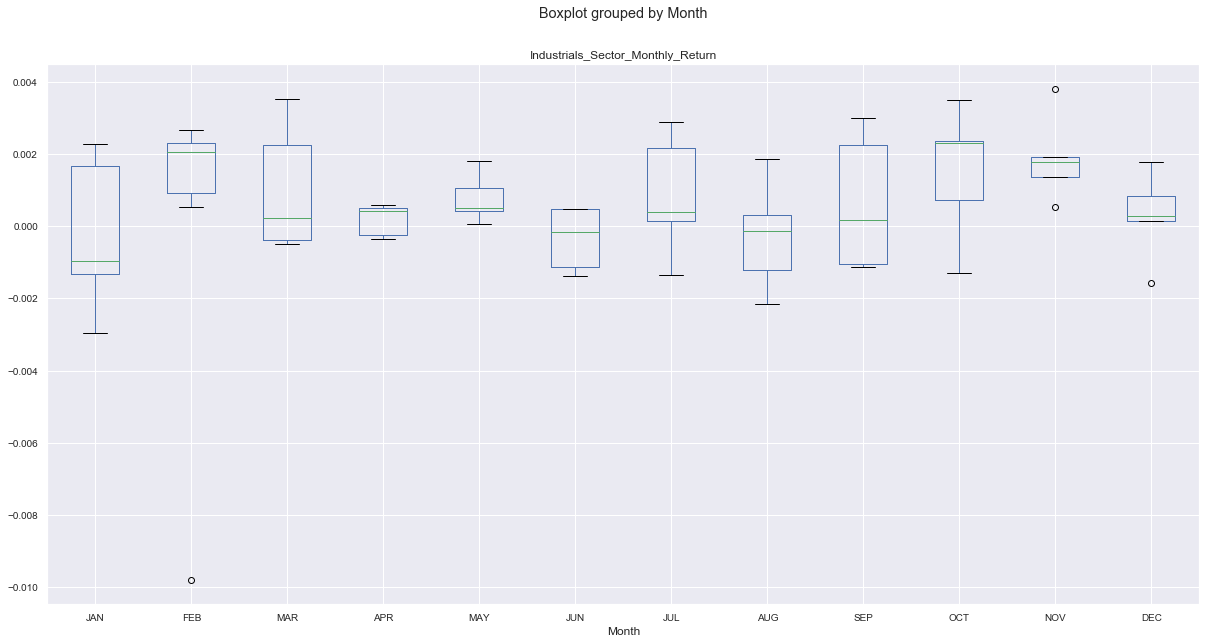

In [89]:
########################################
# 2. Sector Seasonality Analysis:

# 2.1. Boxplot Grouped by Month for Industrials Sector
Monthly_Returns = DailySectorReturn['Industrials'].groupby([DailySectorReturn.index.year.rename('year'), 
                                               DailySectorReturn.index.month.rename('month')]).mean()
rcParams['figure.figsize'] = 20,10
Monthly_Returns_List = []
for i in range(len(Monthly_Returns)):
    Monthly_Returns_List.append({'Year':Monthly_Returns.index[i][0],'Month':Monthly_Returns.index[i][1],
                                 'Industrials_Sector_Monthly_Return': Monthly_Returns[i]})
Monthly_Returns_List=pd.DataFrame(Monthly_Returns_List, columns=('Year','Month','Industrials_Sector_Monthly_Return'))
Monthly_Returns_List.boxplot(column='Industrials_Sector_Monthly_Return', by='Month')
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
ax.set_xticklabels(labels)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


#### Observations/Comments:

* Industrials sector return trend exhibits a wave like pattern: market returns seem to increase from January to February followed by decrease in average returns in March to May. June to December exhibits steady increase in market returns.
* Highest range of return (high to low range of box plot) in the past 6 years occured in February.
* March demonstrates low donwside trade probability as low part of the box plot is closely situated outside the first quantile of the data. 
   - Therefore, it might provide good opportunity for investor to get in market or add to their investments. 
   - However, proper backtesting is needed to prove this hypothesis.
* August & December demonstrate low upside trade probability as upper part of the box plot is closely situated outside the third quantile of the data. 
    - Therefore, it might provide good opportunity for investor to get off market or sell their investments. 
    - However, proper backtesting is needed to prove this hypothesis.
* Months of April to June provide the smallest quarterfinal range (IQR). Coincidentally, the aforementioned months are half year and end of the trading year.

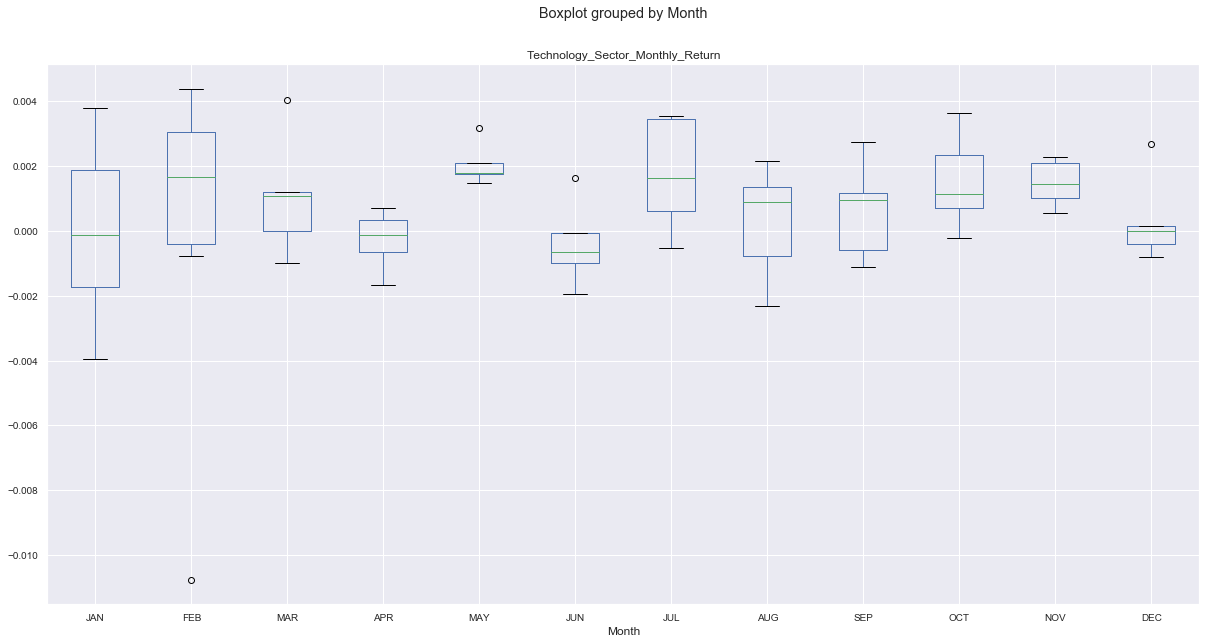

In [90]:
# 2.2. Boxplot Grouped by Month for Technology Sector
Monthly_Returns = DailySectorReturn['Technology'].groupby([DailySectorReturn.index.year.rename('year'), 
                                               DailySectorReturn.index.month.rename('month')]).mean()
rcParams['figure.figsize'] = 20,10
Monthly_Returns_List = []
for i in range(len(Monthly_Returns)):
    Monthly_Returns_List.append({'Year':Monthly_Returns.index[i][0],'Month':Monthly_Returns.index[i][1],
                                 'Technology_Sector_Monthly_Return': Monthly_Returns[i]})
Monthly_Returns_List=pd.DataFrame(Monthly_Returns_List,
                                  columns=('Year','Month','Technology_Sector_Monthly_Return'))
Monthly_Returns_List.boxplot(column='Technology_Sector_Monthly_Return', by='Month')
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
ax.set_xticklabels(labels)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

#### Observations/Comments:

* Technology sector return trend exhibits a wave like pattern: market returns seem to increase from January to February followed by decrease in average returns in March to May. June to December exhibits steady increase in market returns.
* Highest range of return (high to low range of box plot) in the past 6 years occured in February.
* March, July, September, October, November and December demonstrate low donwside trade probability as low part of the box plot is closely situated outside the first quantile of the data. 
    - Therefore, it might provide good opportunity for investor to get in market or add to their investments. 
    - However, proper backtesting is needed to prove this hypothesis.
* January, June, & August demonstrate low upside trade probability as upper part of the box plot is closely situated outside the third quantile of the data. 
    - Therefore, it might provide good opportunity for investor to get off market or sell their investments. 
    - However, proper backtesting is needed to prove this hypothesis.
* Months of April to June and October to November provide the smallest quarterfinal range (IQR). Coincidentally, the aforementioned months are half year and end of the trading year.

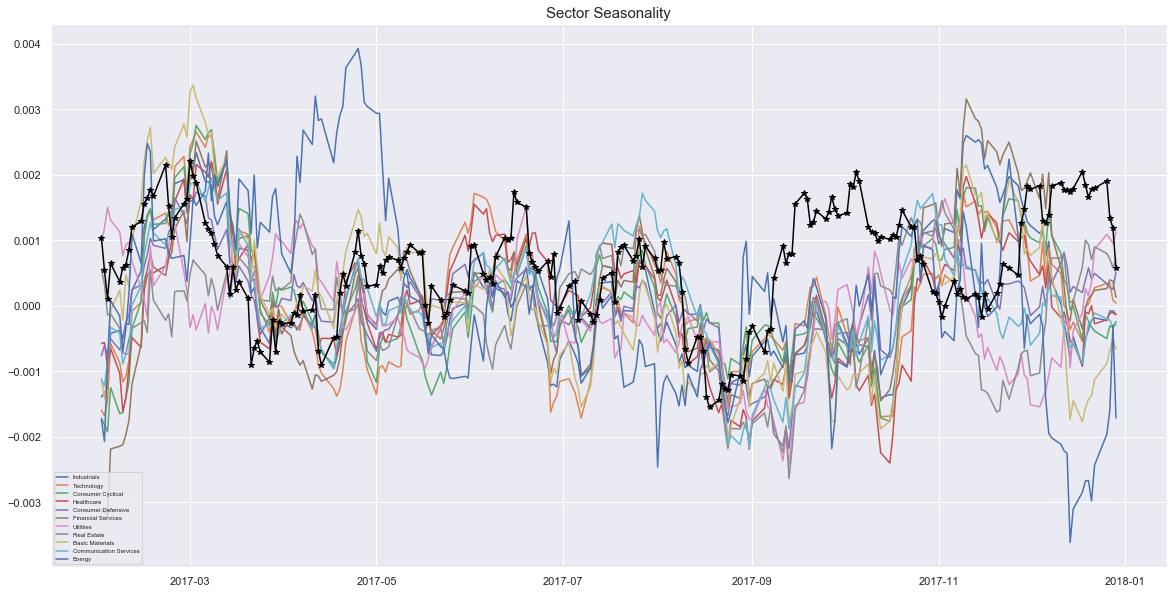

In [91]:
# Sector Seasonality Analysis with S&P 500 Index

SPY_Seasonality = DailySP500Return[DailySP500Return.index.year==2017]
df_ = pd.DataFrame(index=SPY_Seasonality.index, columns=SectorName)

for column in df_:
    Sectors_res = sm.tsa.seasonal.seasonal_decompose(DailySectorReturn[column],model='additive', freq=252)
    Seasonality=Sectors_res.seasonal[Sectors_res.seasonal.index.year == 2017]
    df_[column]=Seasonality

Summary=[]
Legend=SectorName
fig = plt.figure()
ax = fig.add_subplot(111)

for column in df_:
    ax.plot(df_[column].rolling(window=20).mean())
    Summary.append({'Sector': column, 'Min': np.min(df_[column]), 'Max': np.max(df_[column]),
                   'Range':np.max(df_[column])-np.min(df_[column]),'Std':np.std(df_[column]),
                    'Corr to SPY Seasonality': ss.spearmanr(SPY_Seasonality, df_[column])[0] })

ax.plot(SPY_Seasonality.rolling(window=20).mean(), color='black', linestyle='-',marker='*')
plt.title('Sector Seasonality', size = 15)
plt.legend(Legend,loc=3,prop={'size':6})
plt.show()
Summary=pd.DataFrame(Summary, columns=('Sector','Min','Max','Range','Std','Corr to SPY Seasonality'))


#### Observations/Comments:

* Different market sectors seasonality are consistent with those from S&P 500. SPY seasonality in the above picture overlaid with black line.
* Spearman Rank Correlation is used to identify correlation of seasonality of different market sectors to seasonality of S&P 500 market. 
- Sector Consumer Discretionary has highest correlation to S&P 500 market seasonality and sector Real Estate has the least seasonality correlation to market.

In [92]:
# Correlation for Sectors vs SPY Seasonality
Summary.sort_values('Corr to SPY Seasonality', inplace=True)
Summary


,Sector,Min,Max,Range,Std,Corr to SPY Seasonality
6,Utilities,-0.012463,0.013038,0.025501,0.004622,0.010983
10,Energy,-0.024912,0.024519,0.049432,0.008315,0.121106
9,Communication Services,-0.011051,0.014665,0.025715,0.004208,0.131936
4,Consumer Defensive,-0.009752,0.010893,0.020644,0.003392,0.148488
0,Industrials,-0.012280,0.012432,0.024712,0.004290,0.185586
5,Financial Services,-0.015907,0.017267,0.033173,0.005011,0.198669
3,Healthcare,-0.015091,0.011967,0.027058,0.004507,0.206718
8,Basic Materials,-0.013526,0.015236,0.028763,0.005270,0.212101
7,Real Estate,-0.016529,0.013723,0.030252,0.004639,0.234252
2,Consumer Cyclical,-0.015090,0.011883,0.026973,0.004491,0.239266


#### Observations/Comments:

* Stock AMZN price trend exhibits a wave like pattern: market returns seem to increase in January followed by decrease in average returns in February to March. 
    - Then its price exhibits up and down in market returns.
* Highest range of return (high to low range of box plot) in the past 6 years occured in January and October.
* June and July demonstrate low donwside trade probability as low part of the box plot is closely situated outside the first quantile of the data. 
    - Therefore, it might provide good opportunity for investor to get in market or add to their investments. 
    - However, proper backtesting is needed to prove this hypothesis.
* February and November demonstrate low upside trade probability as upper part of the box plot is closely situated outside the third quantile of the data. 
   - Therefore, it might provide good opportunity for investor to get off market or sell their investments.
   - However, proper backtesting is needed to prove this hypothesis.
* Months of June and December provide the smallest quarterfinal range (IQR). Coincidentally, the aforementioned months are half year and end of the trading year.

In [93]:
# Augmented Dickey-Fuller (ADF) Test for stationarity
result = adfuller(HistData['AMZN'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    

ADF Statistic: 2.483785
p-value: 0.999044
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


#### Observations/Comments:
* The null hypothesis states that large p values indicate non-stationarity and smaller p values indicate stationarity. (Using 0.05 as selected alpha value.)
* Augmented Dickey-Fuller (ADF) test revealed the AMZN stock data are non stationary meaning time series is a stochastic process whose unconditional joint probability distribution changes when shifted in time. 
- Since this time series is non stationary, we attempt to exploit seasonality trends using time series decomposition.

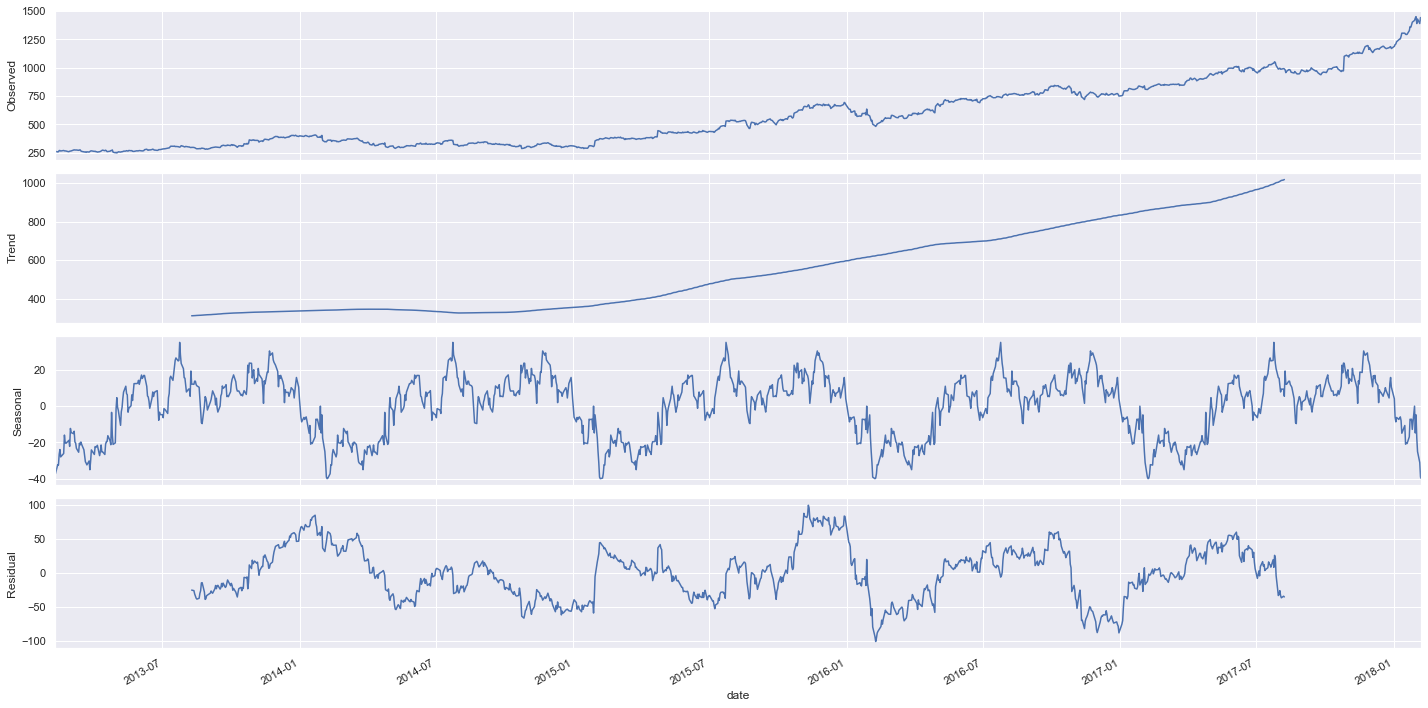

In [94]:
# Seasonality Trends Analysis by Using Time Series Decomposition
AMZNHistData = pd.DataFrame(HistData['AMZN'])
res = sm.tsa.seasonal.seasonal_decompose(AMZNHistData,model='additive', freq=252)
resplot = res.plot()


#### Observations/Comments:
* Stock AMZN price time series $y_t$ comprise three components: a seasonal component, a trend-cycle component (containing both trend and cycle), and a remainder component (containing anything else in the time series). This can be written as: $$y_t=S_t+T_t+E_t$$where $y_t$ is the AMZN stock price at time $t$, $S_t$ is the seasonal component at time $t$, $T_t$ is the trend-cycle component at time $t$ and $E_t$ is the remainder (or irregular or error) component at time $t$.
* Frequency decomposition of 252 meaning that trend is repeated every 252 days (5 trading days and 9 holidays results in 252 trading day).
* Overall trend of the market was increasing while the seasonal trend repeating every year indicate valley and peak.

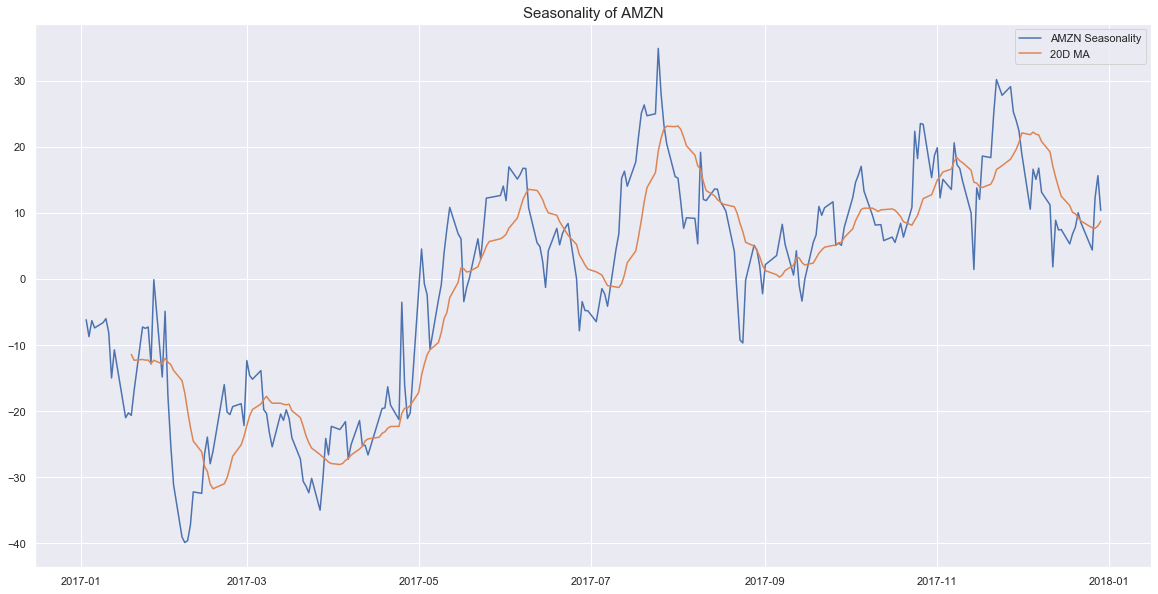

In [95]:
# Seasonality Analysis in Year 2017
AMZN_Seasonality=res.seasonal[res.seasonal.index.year == 2017]
MA1=AMZN_Seasonality.rolling(window=12).mean()
plt.plot(AMZN_Seasonality, label='AMZN Seasonality')
plt.plot(MA1, label='20D MA')
plt.title("Seasonality of AMZN", fontsize=15)
plt.legend()
plt.show()


#### Observations/Comments:
* The seasonal trend repeating every year indicate valley and peak. The seasonality trend is like a wave with major high happening around from January to May and major lows happening around from July to December.
* Market expands from beginning of the year to Spring, then it follows by a period of contraction to mid fall. The seasonality trend reveals change in expectation of market performance during the year.

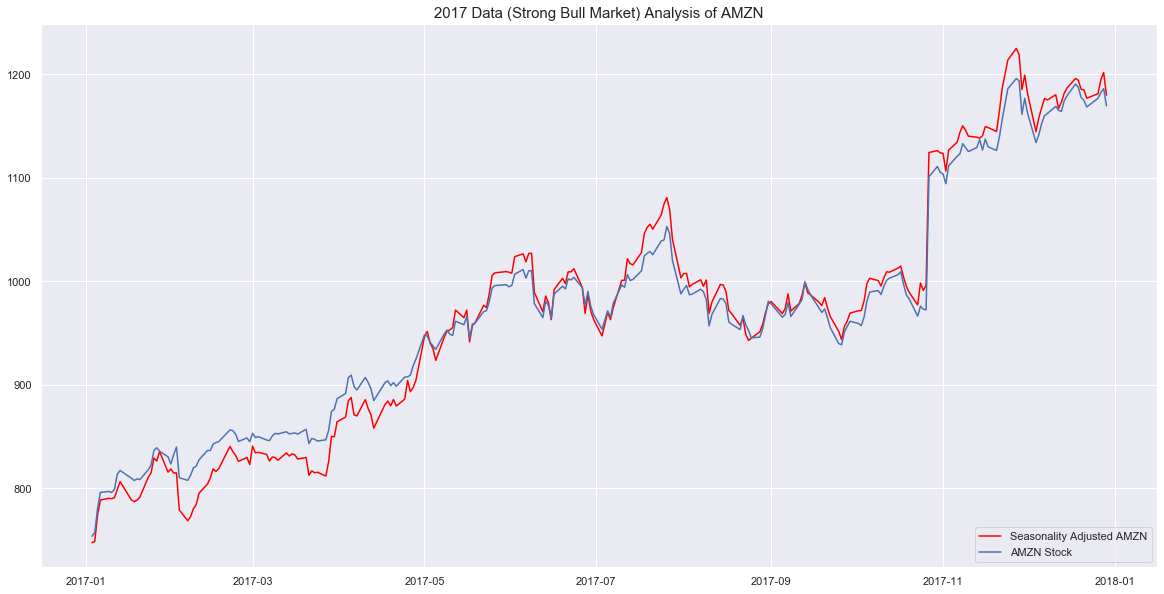

In [96]:
# 2017 Data (Strong Bull Market) Analysis 
plt.plot(AMZNHistData[AMZNHistData.index.year == 2017]+AMZN_Seasonality,color='red',label='Seasonality Adjusted AMZN');
plt.plot(AMZNHistData[AMZNHistData.index.year == 2017],label='AMZN Stock')
plt.plot(figsize = (20,10))
plt.title("2017 Data (Strong Bull Market) Analysis of AMZN", fontsize=15)
plt.legend(loc=4)
plt.show()


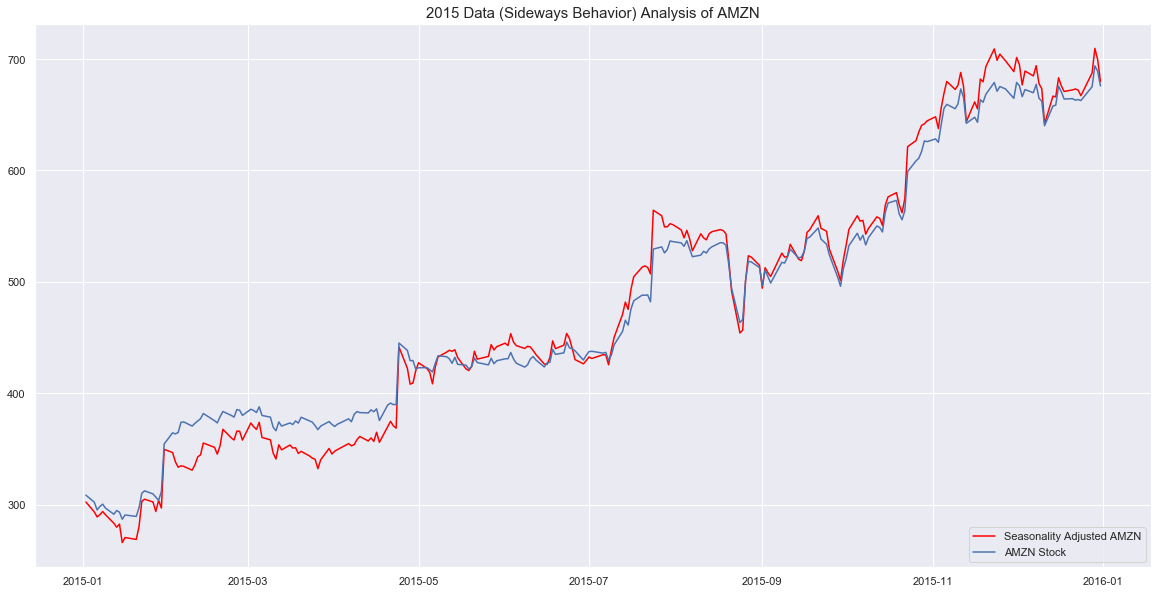

In [97]:
# 2015 Data (Sideways Behavior) Analysis
plt.plot(AMZNHistData[AMZNHistData.index.year == 2015]+res.seasonal[res.seasonal.index.year == 2015],
         color='red',label='Seasonality Adjusted AMZN');
plt.plot(AMZNHistData[AMZNHistData.index.year == 2015],label='AMZN Stock')
plt.plot(figsize = (20,10))
plt.title("2015 Data (Sideways Behavior) Analysis of AMZN", fontsize=15)
plt.legend(loc=4)
plt.show()


#### Observations/Comments:
* Since additive model is used to identify seasonality, we can simply deduct seasonality from stock data (SPY) and adjust for seasonality. In periods where market has strong bull or bear trends (i.e. upward or downward), seasonality effects might be too weak to observe. 
    - However, if market exhibits range bound behavior it, such effect can be more evident.
* 2017 data (strong bull market) and 2015 data (sideways behavior) are provided above.


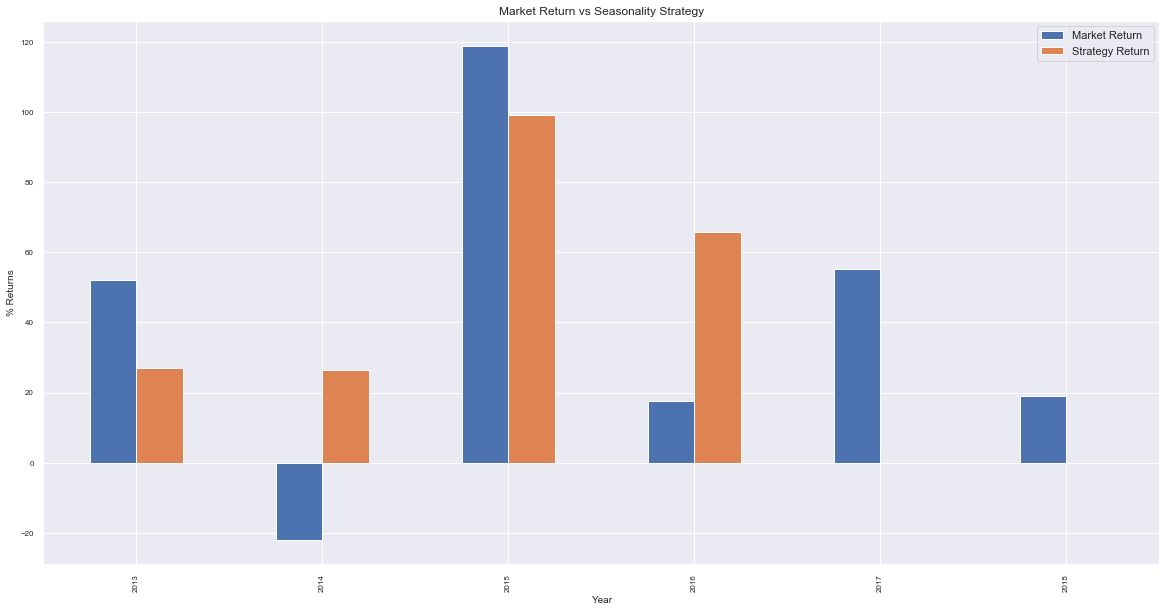

In [98]:
# AMZN Market Return vs Seasonality Strategy Analysis
Min_Month=AMZN_Seasonality.idxmin().dt.month
Max_Month=AMZN_Seasonality.idxmax().dt.month

Index=AMZNHistData.index
Years = list(set(Index.year))
Years.sort()

Returns = d = {'Market Return': pd.Series(index=Years),'Strategy Return': pd.Series(index=Years)}
Returns = pd.DataFrame(Returns)
for index, row in Returns.iterrows():
    Data=AMZNHistData[AMZNHistData.index.year == index]
    row['Market Return']=((Data.iloc[-1]-Data.iloc[0])*100/Data.iloc[0])
    if index<Years[-2]:
        # purchase at first day of min month (this year)
        Purchase=AMZNHistData[(AMZNHistData.index.year==index) & (AMZNHistData.index.month==Min_Month[0])].iloc[0]
        # sell at the first day of max month (next year)
        Sell=AMZNHistData[(AMZNHistData.index.year==index+1) & (AMZNHistData.index.month==Max_Month[0])].iloc[0]
        row['Strategy Return']=(Sell-Purchase)*100/Purchase

ax = Returns[['Market Return','Strategy Return']].plot(kind='bar', title ="Market Return vs Seasonality Strategy", 
                                                       figsize=(20, 10), legend=True, fontsize=8)
ax.set_xlabel("Year", fontsize=10)
ax.set_ylabel("% Returns", fontsize=10)
plt.show()


[]

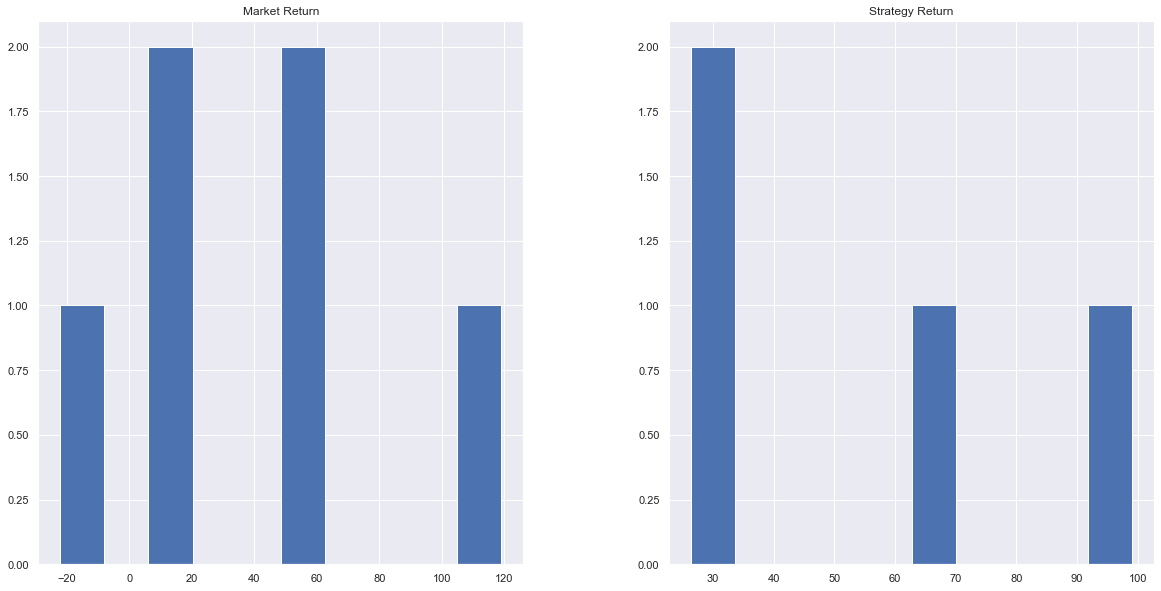

In [99]:
# Histogram for AMZN Market Return vs Seasonality Strategy Analysis
Returns.hist();
plt.plot(figsize = (20,10))

#### Observations/Comments:
* Simply test the return of a simple strategy based on seasonality. AMZN stock can be bought in December and sold the entire holdings in January or simply comparing return of AMZN stock from December of each year to January of next year.
* This strategy is not as profitable as simply buying and holding for entire year. This strategy is extremely simple without considering proper entry and exit point within each month. Therefore, in order to fully understand the profitability and risk of this strategy, in depth analysis is required which is outside the scope of this project.

<Figure size 1440x720 with 0 Axes>

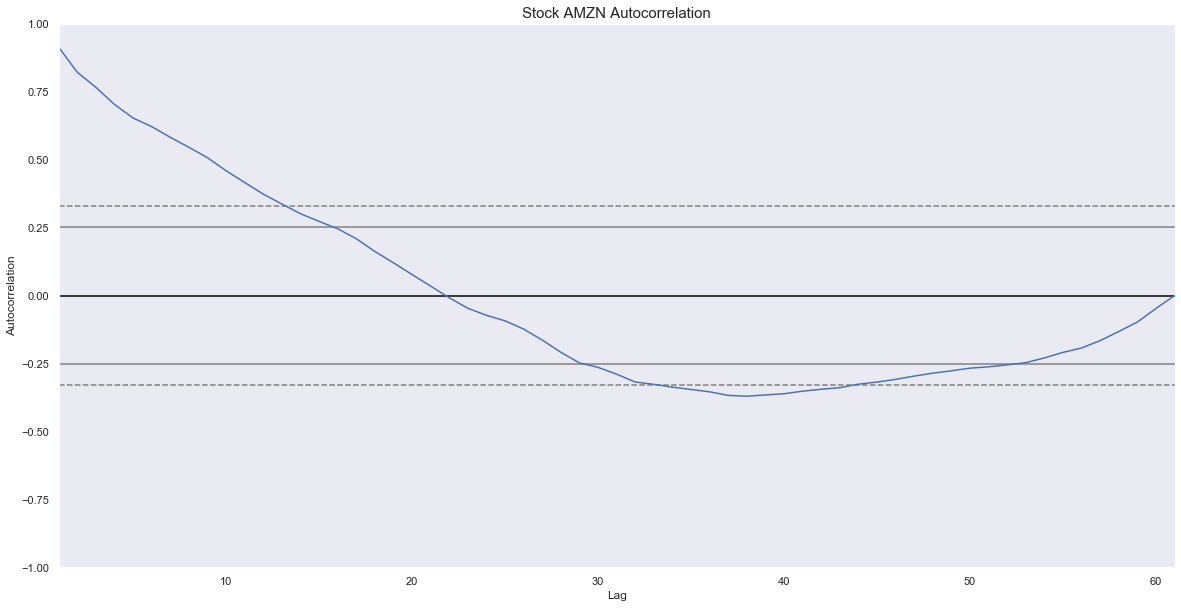

<Figure size 1440x720 with 0 Axes>

In [100]:
# Autocorrelation Assessment for AMZN Stock Seasonality Analysis
plt.figure()
autocorrelation_plot(HistData_MonthEnd['AMZN'].dropna())
plt.title('Stock AMZN Autocorrelation', size = 15)
plt.figure()


#### Observations/Comments:

* The python code plot is the autocorrelation of AMZN stock monthly data. Usually, autocorrelation coefficient is in the range [-1, 1], with 1 indicating perfect correlation and -1 inicating perfect anti-correlation.
* From the horizontal line for Lag, the first ten delayed copies (lags) can be considered to be correlated and the rest lags are more close to zero and have not been autocorrelated. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'A Lag Plot with 1 period of lag')

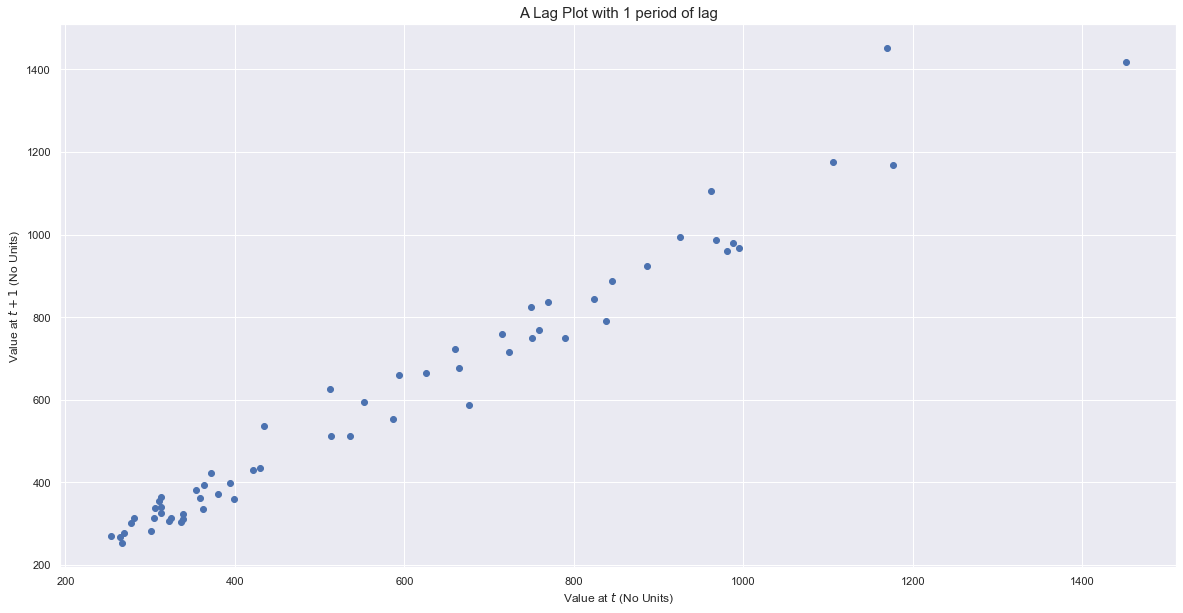

In [101]:
# Lag Plot Show for Lag 1
aLagPlot = pd.plotting.lag_plot(series=HistData_MonthEnd['AMZN'].dropna(), lag=1)
aLagPlot.set_ylabel("Value at ${t+1}$ (No Units)")
aLagPlot.set_xlabel("Value at $t$ (No Units)")
aLagPlot.set_title("A Lag Plot with 1 period of lag", size = 15)


#### Observations/Comments:

* The lag plot shows that lag 1 is autocorrelation, which means that the data with 1 month shift is correlated.
* This analysis is consistent with the seasonality analysis above.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'A Lag Plot with 2 period of lag')

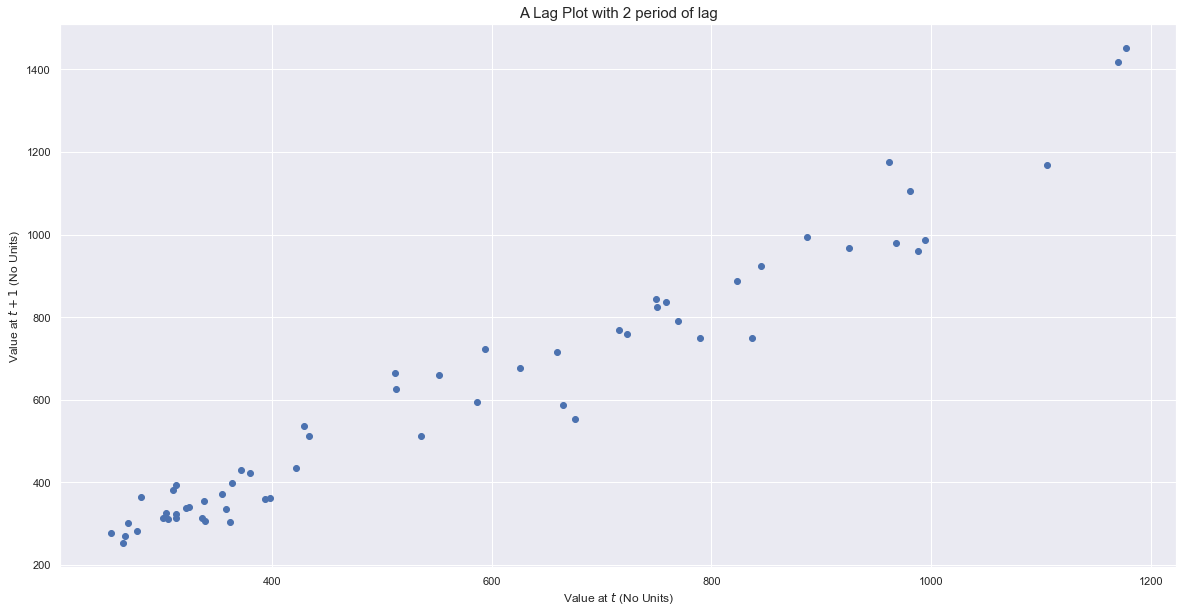

In [102]:
# Lag Plot Show for Lag 2
aLagPlot = pd.plotting.lag_plot(series=HistData_MonthEnd['AMZN'].dropna(), lag=2)
aLagPlot.set_ylabel("Value at ${t+1}$ (No Units)")
aLagPlot.set_xlabel("Value at $t$ (No Units)")
aLagPlot.set_title("A Lag Plot with 2 period of lag", size = 15)


#### Observations/Comments:

* The lag plot shows that lag 2 is autocorrelation, which means that the data with 2 month shift is correlated.
* This analysis is consistent with the seasonality analysis above.

---
# Part 4 - Stock Price Forecasting and Prediction

In this part, S&P 500 sector return (up & down or positive & negative) is forecasted through K nearest neighbour (KNN Approach)

#### Task 8:

* Some other prediction model analysis?


In [103]:
################################################################
# Sector Industrials Return Forecast through K Nearest Neighbor (KNN) Approach

# Sector Industiral Stock Daily Return
SectorStockList = SectorDict["Industrials"]
x=DailyReturn[SectorStockList]
x.head()


ticker,AAL,ADP,ALK,ALLE,AME,AOS,ARNC,AVY,BA,CAT,...,TDG,TXT,UAL,UNP,UPS,URI,UTX,VRSK,WM,XYL
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,-0.019661,-0.009602,0.002671,NaN,0.001206,-0.000572,-0.007830,-0.001019,-0.009013,-0.002581,...,0.014890,0.008530,0.007602,0.002028,0.003763,0.004332,-0.005328,-0.005100,0.000275,0.013658
2013-02-12,-0.013140,0.000331,0.001230,NaN,0.007468,0.008869,0.018038,0.005611,0.001582,0.006418,...,-0.001860,-0.014208,-0.023387,0.009369,-0.004595,0.018380,0.004129,-0.007140,0.004131,0.017844
2013-02-13,0.027330,0.001491,0.013508,NaN,0.004304,0.007373,0.007752,0.004565,-0.015923,-0.008640,...,-0.001104,0.008922,0.011587,0.004604,0.002308,0.021915,-0.005335,0.006270,0.004937,0.011091
2013-02-14,-0.045703,0.004797,-0.016357,NaN,-0.002143,0.005067,0.020879,0.002020,0.002006,-0.003216,...,-0.009050,0.002721,-0.012218,0.006505,0.002303,0.007389,0.002123,-0.005498,0.013646,0.007431


In [104]:
# Drop First NaN Row for Sector Industiral Stock Daily Return
x=x.drop(x.index[0])
x.head()


ticker,AAL,ADP,ALK,ALLE,AME,AOS,ARNC,AVY,BA,CAT,...,TDG,TXT,UAL,UNP,UPS,URI,UTX,VRSK,WM,XYL
date,,,,,,,,,,,,,,,,,,,,,
2013-02-11,-0.019661,-0.009602,0.002671,NaN,0.001206,-0.000572,-0.007830,-0.001019,-0.009013,-0.002581,...,0.014890,0.008530,0.007602,0.002028,0.003763,0.004332,-0.005328,-0.005100,0.000275,0.013658
2013-02-12,-0.013140,0.000331,0.001230,NaN,0.007468,0.008869,0.018038,0.005611,0.001582,0.006418,...,-0.001860,-0.014208,-0.023387,0.009369,-0.004595,0.018380,0.004129,-0.007140,0.004131,0.017844
2013-02-13,0.027330,0.001491,0.013508,NaN,0.004304,0.007373,0.007752,0.004565,-0.015923,-0.008640,...,-0.001104,0.008922,0.011587,0.004604,0.002308,0.021915,-0.005335,0.006270,0.004937,0.011091
2013-02-14,-0.045703,0.004797,-0.016357,NaN,-0.002143,0.005067,0.020879,0.002020,0.002006,-0.003216,...,-0.009050,0.002721,-0.012218,0.006505,0.002303,0.007389,0.002123,-0.005498,0.013646,0.007431
2013-02-15,0.036455,0.007903,0.005543,NaN,0.000000,0.007842,0.003229,0.001008,0.001335,-0.004788,...,0.002301,-0.003053,0.019327,0.004847,0.009554,-0.018426,0.012153,0.011240,-0.012116,-0.006674


In [105]:
# Check NaN Column for Sector Industrialtiral Stock Daily Return
x.isnull().sum().unique()


array([  0, 196, 342], dtype=int64)

In [106]:
# Fullfill NaN Column with Column Mean for Sector Industrial Stock Daily Return
x=x.fillna(x.mean())
x


ticker,AAL,ADP,ALK,ALLE,AME,AOS,ARNC,AVY,BA,CAT,...,TDG,TXT,UAL,UNP,UPS,URI,UTX,VRSK,WM,XYL
date,,,,,,,,,,,,,,,,,,,,,
2013-02-11,-0.019661,-0.009602,0.002671,0.000557,0.001206,-0.000572,-0.007830,-0.001019,-0.009013,-0.002581,...,0.014890,0.008530,0.007602,0.002028,0.003763,0.004332,-0.005328,-0.005100,0.000275,0.013658
2013-02-12,-0.013140,0.000331,0.001230,0.000557,0.007468,0.008869,0.018038,0.005611,0.001582,0.006418,...,-0.001860,-0.014208,-0.023387,0.009369,-0.004595,0.018380,0.004129,-0.007140,0.004131,0.017844
2013-02-13,0.027330,0.001491,0.013508,0.000557,0.004304,0.007373,0.007752,0.004565,-0.015923,-0.008640,...,-0.001104,0.008922,0.011587,0.004604,0.002308,0.021915,-0.005335,0.006270,0.004937,0.011091
2013-02-14,-0.045703,0.004797,-0.016357,0.000557,-0.002143,0.005067,0.020879,0.002020,0.002006,-0.003216,...,-0.009050,0.002721,-0.012218,0.006505,0.002303,0.007389,0.002123,-0.005498,0.013646,0.007431
2013-02-15,0.036455,0.007903,0.005543,0.000557,0.000000,0.007842,0.003229,0.001008,0.001335,-0.004788,...,0.002301,-0.003053,0.019327,0.004847,0.009554,-0.018426,0.012153,0.011240,-0.012116,-0.006674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,-0.008100,-0.025965,-0.025103,-0.010916,0.021101,0.000150,0.001663,-0.018911,0.007252,-0.003317,...,-0.005396,0.019942,-0.009879,-0.008390,-0.061342,-0.008061,0.002246,0.002099,-0.006559,0.035704
2018-02-02,-0.033036,-0.015363,0.007491,-0.038981,-0.008471,-0.032190,-0.033212,-0.022682,-0.022497,-0.029278,...,-0.025127,-0.013035,-0.021891,-0.022813,-0.025437,-0.035347,-0.026822,-0.014263,-0.015026,0.010957
2018-02-05,-0.044914,-0.037952,-0.028191,-0.033476,-0.043366,-0.047649,-0.088973,-0.032475,-0.057407,-0.040701,...,-0.033910,-0.040637,-0.034714,-0.040353,-0.027217,-0.038027,-0.054751,-0.039866,-0.055241,-0.039651


In [107]:
# Re-Check NaN Column for Sector Industrial Stock Daily Return
x.isnull().sum().unique()


array([0], dtype=int64)

In [108]:
# Check Sector Industiral Stock Daily Return
x.tail()


ticker,AAL,ADP,ALK,ALLE,AME,AOS,ARNC,AVY,BA,CAT,...,TDG,TXT,UAL,UNP,UPS,URI,UTX,VRSK,WM,XYL
date,,,,,,,,,,,,,,,,,,,,,
2018-02-01,-0.008100,-0.025965,-0.025103,-0.010916,0.021101,0.000150,0.001663,-0.018911,0.007252,-0.003317,...,-0.005396,0.019942,-0.009879,-0.008390,-0.061342,-0.008061,0.002246,0.002099,-0.006559,0.035704
2018-02-02,-0.033036,-0.015363,0.007491,-0.038981,-0.008471,-0.032190,-0.033212,-0.022682,-0.022497,-0.029278,...,-0.025127,-0.013035,-0.021891,-0.022813,-0.025437,-0.035347,-0.026822,-0.014263,-0.015026,0.010957
2018-02-05,-0.044914,-0.037952,-0.028191,-0.033476,-0.043366,-0.047649,-0.088973,-0.032475,-0.057407,-0.040701,...,-0.033910,-0.040637,-0.034714,-0.040353,-0.027217,-0.038027,-0.054751,-0.039866,-0.055241,-0.039651
2018-02-06,0.028537,-0.009819,0.007172,0.012641,0.010961,0.012346,-0.046757,0.003778,0.036579,0.035279,...,-0.020885,0.007766,0.008675,0.056469,-0.005207,0.027773,0.020198,0.001265,0.000612,-0.018304
2018-02-07,0.004299,0.005401,0.016458,-0.001872,-0.007362,0.006418,-0.007120,0.004727,0.021149,-0.013234,...,0.004954,0.014186,0.022048,-0.016698,-0.007098,0.013073,0.016640,-0.003368,-0.000856,0.006449


In [109]:
x.shape


(1258, 72)

In [110]:
x.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2013-02-11 to 2018-02-07
Data columns (total 72 columns):
AAL     1258 non-null float64
ADP     1258 non-null float64
ALK     1258 non-null float64
ALLE    1258 non-null float64
AME     1258 non-null float64
AOS     1258 non-null float64
ARNC    1258 non-null float64
AVY     1258 non-null float64
BA      1258 non-null float64
CAT     1258 non-null float64
CHRW    1258 non-null float64
CMI     1258 non-null float64
COL     1258 non-null float64
CSX     1258 non-null float64
CTAS    1258 non-null float64
DAL     1258 non-null float64
DE      1258 non-null float64
DOV     1258 non-null float64
EFX     1258 non-null float64
EMR     1258 non-null float64
ETN     1258 non-null float64
EXPD    1258 non-null float64
FAST    1258 non-null float64
FDX     1258 non-null float64
FIS     1258 non-null float64
FISV    1258 non-null float64
FLR     1258 non-null float64
FLS     1258 non-null float64
GD      1258 non-null float64
GE   

In [111]:
# Sector Industrial Daily Return
y=pd.DataFrame(DailySectorReturn['Industrials'])
y.head()


,Industrials
date,
2013-02-11,-0.000030
2013-02-12,0.002455
2013-02-13,0.004158
2013-02-14,-0.000760
2013-02-15,0.002440


In [112]:
# Check Sector Industrial Daily Return
y.tail()


,Industrials
date,
2018-02-01,-0.001138
2018-02-02,-0.019747
2018-02-05,-0.041408
2018-02-06,0.010553
2018-02-07,0.002712


In [113]:
y.shape


(1258, 1)

In [114]:
y.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2013-02-11 to 2018-02-07
Data columns (total 1 columns):
Industrials    1258 non-null float64
dtypes: float64(1)
memory usage: 59.7 KB


In [115]:
# Target Variable for Sector Industrial Daily Return
y = np.where(y>0,1,-1)
y


array([[-1],
       [ 1],
       [ 1],
       ...,
       [-1],
       [ 1],
       [ 1]])

In [116]:
# KNN Approach Fitting
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [117]:
# Predicting by the trained (fitted) model
y_hat=knn.predict(x)
y_hat


array([ 1,  1,  1, ..., -1,  1,  1])

In [118]:
# Accuracy Check
accuracy_score(y_hat,y)


0.9793322734499205

In [119]:
#################################################
# Use Training and Test Data Set

# Define Train and Test Data Sets for Sector Industrial Daily Return
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1,random_state=42)


In [120]:
# KNN Approach Fitting for Train Data
knn.fit(x_train,y_train)


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [121]:
# Predicting by the trained (fitted) model
y_hat=knn.predict(x_test)
y_hat

array([-1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1,
        1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,
       -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1,
        1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1, -1, -1,  1, -1, -1,  1])

In [122]:
y_test


array([[-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],

In [123]:
# Compare predicted classes and test of Y
print('Result of y_test == y_hat = \n', y_test == y_hat)


Result of y_test == y_hat = 
 [[ True False False ...  True  True False]
 [False  True  True ... False False  True]
 [False  True  True ... False False  True]
 ...
 [ True False False ...  True  True False]
 [False  True  True ... False False  True]
 [False  True  True ... False False  True]]


In [124]:
# Accuracy score
accuracy_score(y_test,y_hat)


0.9682539682539683

#### Observations/Comments:

Use the KNN approach to forecast the sector return has an accuracy score around 97% based on the returns from the sector individual stocks. 

---
# Part 5 - Conclusion

Based on our various analyses of the SP500 data we obtained, we cannot provide a good stock selection strategy as looking at stock volatility and days of negative return till positive return did not yield meaningful conclusions. However, technology does prove to be a growing sector with the best average return in comparison to other sectors. We also found that the sector performs well historically from July to November, therefore investing prior to this period each year can provide a good start.

## References



https://en.wikipedia.org/wiki/List_of_S%26P_500_companies
